In [1]:
import pandas as pd
from collections import Counter


In [2]:
import os
import random
import numpy as np
import pickle
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def normalizeTargets(i,file):
    print(file)
    ratefile =  os.path.join(file,file+"_rate.npy")
    
    nTargets_1 =np.load(ratefile)
    
    ratefile_train =  ratefile
    #os.path.join('train','train'+"_rate.npy")
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)
    
    norm = 'zscore'

    if(norm == 'zscore'):
        nTargets =nTargets_1- mean
        nTargets = np.divide(nTargets,std,out=np.zeros_like(nTargets),where=std!=0)
        
    else:
        nTargets = -np.log(nTargets_1)

    return nTargets_1[i],nTargets[i],nTargets_1[i]*10e7

In [4]:
def de_normalizeTargets(error,file='train'):
    ratefile =  os.path.join(file,file+"_rate.npy")

    nTargets_1 =np.load(ratefile)

    ratefile_train =  ratefile
    
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    
    std = np.std(nTa,axis=0)
  

    erro = np.dot(error,std)+mean
   
   
    '''
    erro = np.exp(-error)
    '''
    return erro

In [5]:
def SNP_WINDOW(w,i,file):
 
    respectiveNormalizedTargets,respectiveNormalizedTargets_z,respectiveNormalizedTargets_scaled = normalizeTargets(i,file)
    targets= np.array(respectiveNormalizedTargets)
    z_target= np.array(respectiveNormalizedTargets_z)
    scaled_target = np.array(respectiveNormalizedTargets_scaled)
    
    lis=[]

    for i in w:
        co = dict(Counter(i))
        if len(co.keys())==2:
            lis.append(co[min(co,key=co.get)]/len(i))
    bins = np.linspace(0, 1, 20)

    bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
    bins= bins[1:]
    bin_means= bin_means/bin_means.sum()
    
    #plt.bar(range(19), bin_means)
    #plt.show()
    return np.array(bins),targets,z_target,scaled_target,bin_means[:10]


In [6]:
def break_window(ha,po,ra,winsize):
    print(len(ha))
    bins = np.linspace(0, len(ha),winsize)

    bin_means,bins = np.histogram(ha, bins)
    print(bin_means)

In [7]:
def __data_generation1(batchTreeIndices,file):

        haps = []
        pos = []
        rate =[]
        for treeIndex in batchTreeIndices:
            Hfilepath = os.path.join(file,str(treeIndex) + "_haps.npy")
            #Pfilepath = os.path.join(file, str(treeIndex) +"_pos.npy")
            H = np.load(Hfilepath)
            #P = np.load(Pfilepath)

            haps.append(H)
            #pos.append(P)

        return haps#,pos


            
def __getitem__1(idx,val):
    X= __data_generation1([idx],val)
    return X#,x1

In [8]:
def logit_(val):
    ret_val=[]
    for i in range(len(val)):
           ret_val.append(np.log(val[i]))
            
    return ret_val
        

In [16]:
lis_train_100k=[]
train_target_un_100k=[]
train_target_z_100k=[]
train_target_scaled_100k=[]
for i in range(6000):
    x= __getitem__1(i,'train_100k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_100k')

    lis_train_100k.append(vale1)
        
    train_target_un_100k.append(targets)
    train_target_z_100k.append(z_target)
    train_target_scaled_100k.append(scaled_target)



/tmp/ipykernel_14770/955718689.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [9]:
lis_train_50k=[]
train_target_un_50k=[]
train_target_z_50k=[]
train_target_scaled_50k=[]
for i in range(1000,12000):
    x= __getitem__1(i,'train_50k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_50k')
    
    lis_train_50k.append(vale1)

    train_target_un_50k.append(targets)
    train_target_z_50k.append(z_target)
    train_target_scaled_50k.append(scaled_target)



train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


/tmp/ipykernel_1416457/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k
train_50k


In [132]:
lis_train_10k=[]
train_target_un_10k=[]
train_target_z_10k=[]
train_target_scaled_10k=[]
for i in range(10000):
    x= __getitem__1(i,'train_10k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_10k')
    
    lis_train_10k.append(vale1)

    train_target_un_10k.append(targets)
    train_target_z_10k.append(z_target)
    train_target_scaled_10k.append(scaled_target)



train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


/tmp/ipykernel_1416457/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k
train_10k


In [133]:
lis_train_25k=[]
train_target_un_25k=[]
train_target_z_25k=[]
train_target_scaled_25k=[]
for i in range(10000):
    x= __getitem__1(i,'train_25k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_25k')
    
    lis_train_25k.append(vale1)

    train_target_un_25k.append(targets)
    train_target_z_25k.append(z_target)
    train_target_scaled_25k.append(scaled_target)



train_25k
train_25k
train_25k


/tmp/ipykernel_1416457/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k
train_25k


In [134]:
lis_train_75k=[]
train_target_un_75k=[]
train_target_z_75k=[]
train_target_scaled_75k=[]
for i in range(10000):
    x= __getitem__1(i,'train_75k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_75k')
    
    lis_train_75k.append(vale1)

    train_target_un_75k.append(targets)
    train_target_z_75k.append(z_target)
    train_target_scaled_75k.append(scaled_target)



train_75k
train_75k
train_75k


/tmp/ipykernel_1416457/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k
train_75k


In [141]:
lis_train_100k=[]
train_target_un_100k=[]
train_target_z_100k=[]
train_target_scaled_100k=[]
for i in range(10000):
    x= __getitem__1(i,'train_100k')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'train_100k')
    
    lis_train_100k.append(vale1)

    train_target_un_100k.append(targets)
    train_target_z_100k.append(z_target)
    train_target_scaled_100k.append(scaled_target)



train_100k
train_100k
train_100k
train_100k
train_100k
train_100k


/tmp/ipykernel_1416457/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k
train_100k

In [10]:
def make_shannon(fd):
    from scipy.stats import entropy
    li=[]
    for i in fd: 
        li.append(entropy(i))
    
    return li
        


In [31]:
li_24= [make_shannon(lis_train_non_eq[i*20:20*(i+1)]) for i in range(6)]

In [21]:
lis_train_non_eq=[]
train_target_un_non_eq=[]
train_target_z_non_eq=[]
train_target_scaled_non_eq=[]
for i in range(120):
    x= __getitem__1(i,'non_eq')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'non_eq')

    lis_train_non_eq.append(vale1)
        
    train_target_un_non_eq.append(targets)
    train_target_z_non_eq.append(z_target)
    train_target_scaled_non_eq.append(scaled_target)



/tmp/ipykernel_1435178/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [254]:
lis_train_con=[]
train_target_un_con=[]
train_target_z_con=[]
train_target_scaled_con=[]
for i in range(6000):
    x= __getitem__1(i,'gene_conversion_eq')
    
    vale2,targets,z_target,scaled_target,vale1 = SNP_WINDOW(x[0],i,'gene_conversion_eq')

    lis_train_con.append(vale1)
        
    train_target_un_con.append(targets)
    train_target_z_con.append(z_target)
    train_target_scaled_con.append(scaled_target)


/tmp/ipykernel_413261/2387080519.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [99]:
lis_train_non_eq[0]

array([0.21955403, 0.11149228, 0.53859348, 0.02058319, 0.04631218,
       0.        , 0.03259005, 0.01200686, 0.01886792, 0.        ])

In [25]:
lis_train_50k

[array([0.23      , 0.17      , 0.44      , 0.01      , 0.        ,
        0.09666667, 0.        , 0.        , 0.05333333, 0.        ]),
 array([0.27384615, 0.03692308, 0.01230769, 0.04923077, 0.        ,
        0.49846154, 0.10153846, 0.01846154, 0.00923077, 0.        ]),
 array([0.39156627, 0.1746988 , 0.07228916, 0.04819277, 0.        ,
        0.02409639, 0.03614458, 0.        , 0.07228916, 0.18072289]),
 array([0.10569106, 0.25203252, 0.0203252 , 0.0203252 , 0.00813008,
        0.        , 0.49593496, 0.        , 0.09756098, 0.        ]),
 array([0.66292135, 0.14382022, 0.00674157, 0.0741573 , 0.0494382 ,
        0.04044944, 0.        , 0.02022472, 0.00224719, 0.        ]),
 array([0.40412979, 0.06784661, 0.04424779, 0.02359882, 0.00294985,
        0.        , 0.01179941, 0.38643068, 0.01474926, 0.04424779]),
 array([0.13134328, 0.42985075, 0.00895522, 0.04179104, 0.13432836,
        0.00298507, 0.13134328, 0.        , 0.11940299, 0.        ]),
 array([0.33333333, 0.20261438, 0.

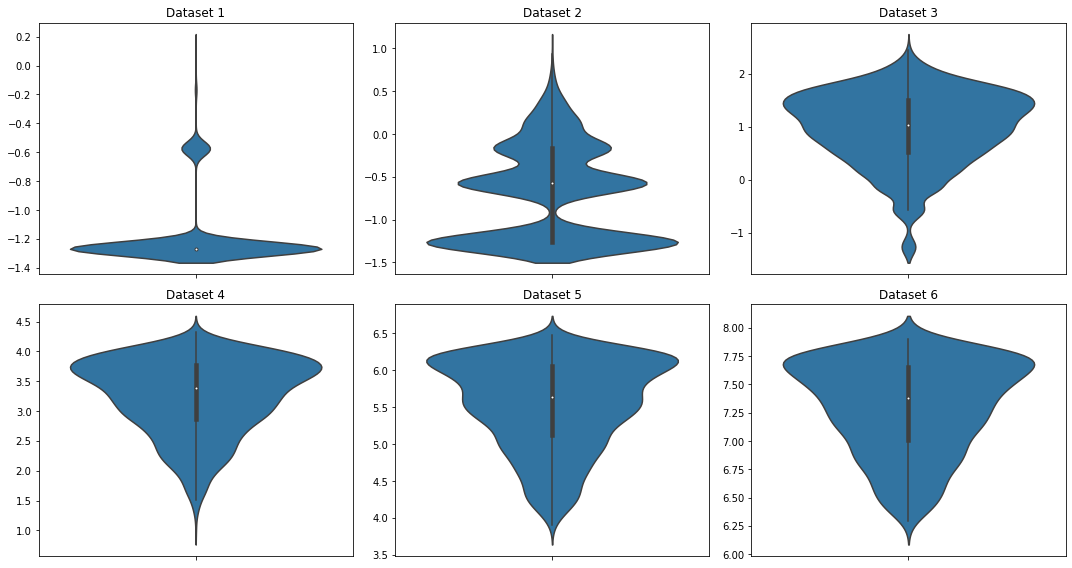

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the violin plots
data = li_25
# Create a violin plot for each dataset
plt.figure(figsize=(15, 8))
for i, dataset in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=dataset)
    plt.title(f'Dataset {i+1}')

plt.tight_layout()
plt.show()



In [52]:
li_25= [make_shannon(lis_train_50k[i*2000:2000*(i+1)]) for i in range(6)]

In [70]:
li_25= [logit_(train_target_un_50k[i*2000:2000*(i+1)]) for i in range(6)]

In [71]:
for i in range(len(li_25)):
    print('bin:',i,'mean:',np.mean(li_25[i]),'variance:',np.var(li_25[i]))

bin: 0 mean: -1.189220730804795 variance: 0.05042224527971316
bin: 1 mean: -0.6754622039994954 variance: 0.29333432249723956
bin: 2 mean: 0.9821346233097824 variance: 0.469490908507443
bin: 3 mean: 3.2570698336893993 variance: 0.3917390955003544
bin: 4 mean: 5.541713770114657 variance: 0.3662173455202107
bin: 5 mean: 7.30279318600849 variance: 0.16559082757283886


In [22]:

def calculate_mean_variance(list_of_lists):
    return [(round(np.mean(sublist), 5), round(np.var(sublist), 5)) for sublist in list_of_lists]
mean_var_25 = calculate_mean_variance(li_25)
#mean_var_24 = calculate_mean_variance(li_24)
mean_var_26 = calculate_mean_variance(li_26)



columns = ['List'] + ['-13 to -12','-12 to -11','-11 to -10','-10 to -9','-9 to -8','-8 to -7']
df_rearranged = pd.DataFrame(columns=columns)

for lst, name in zip([li_25, li_26], [ 'conversion', 'Equilibrium']):
    row = [name]
    for mean, var in calculate_mean_variance(lst):
        row.append("Mean:"+str(mean)+" "+"Variance:"+str(var))
    df_rearranged.loc[len(df_rearranged)] = row

df_rearranged.to_csv('data.csv', index=False)


NameError: name 'li_25' is not defined

In [ ]:

def calculate_mean_variance(list_of_lists):
    return [(round(np.mean(sublist), 5), round(np.var(sublist), 5)) for sublist in list_of_lists]
mean_var_25 = calculate_mean_variance(li_25)
#mean_var_24 = calculate_mean_variance(li_24)
mean_var_26 = calculate_mean_variance(li_26)



columns = ['List'] + ['-13 to -12','-12 to -11','-11 to -10','-10 to -9','-9 to -8','-8 to -7']
df_rearranged = pd.DataFrame(columns=columns)

for lst, name in zip([li_24,li_25, li_26,li_27], ['Non_Equilibrium', 'conversion', 'Equilibrium','Split']):
    row = [name]
    for mean, var in calculate_mean_variance(lst):
        row.append("Mean:"+str(mean)+" "+"Variance:"+str(var))
    df_rearranged.loc[len(df_rearranged)] = row

df_rearranged.to_csv('data.csv', index=False)



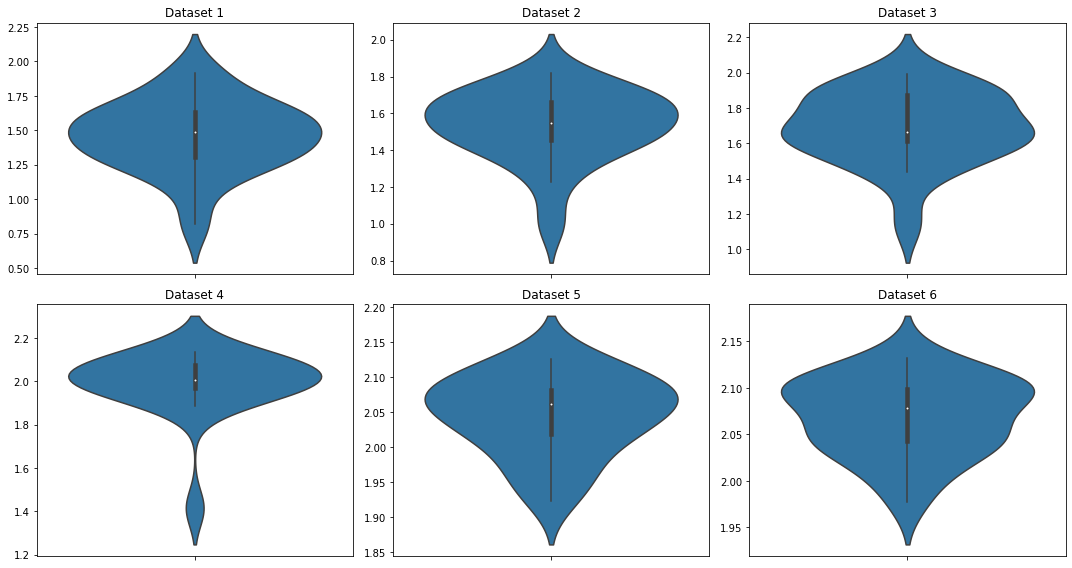

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the violin plots
data = li_25
# Create a violin plot for each dataset
plt.figure(figsize=(15, 8))
for i, dataset in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=dataset)
    plt.title(f'Dataset {i+1}')

plt.tight_layout()
plt.show()



In [256]:
li_26= [make_shannon(lis_train_50k[i*1000:1000*(i+1)]) for i in range(6)]

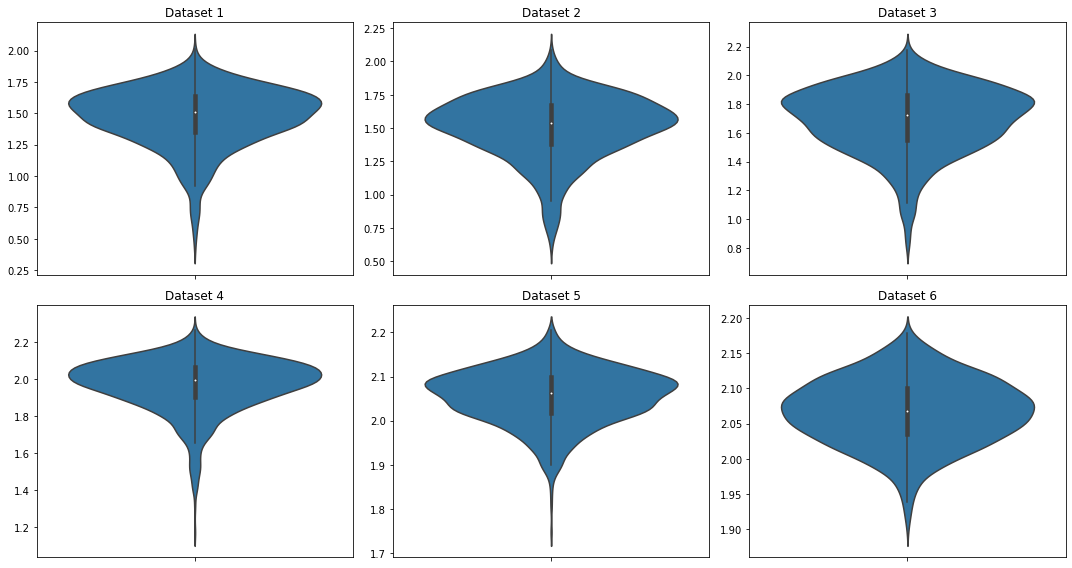

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the violin plots
data = li_26
# Create a violin plot for each dataset
plt.figure(figsize=(15, 8))
for i, dataset in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=dataset)
    plt.title(f'Dataset {i+1}')

plt.tight_layout()
plt.show()



In [106]:
li_27= [make_shannon(lis_train_pop_split[i*20:20*(i+1)]) for i in range(5)]


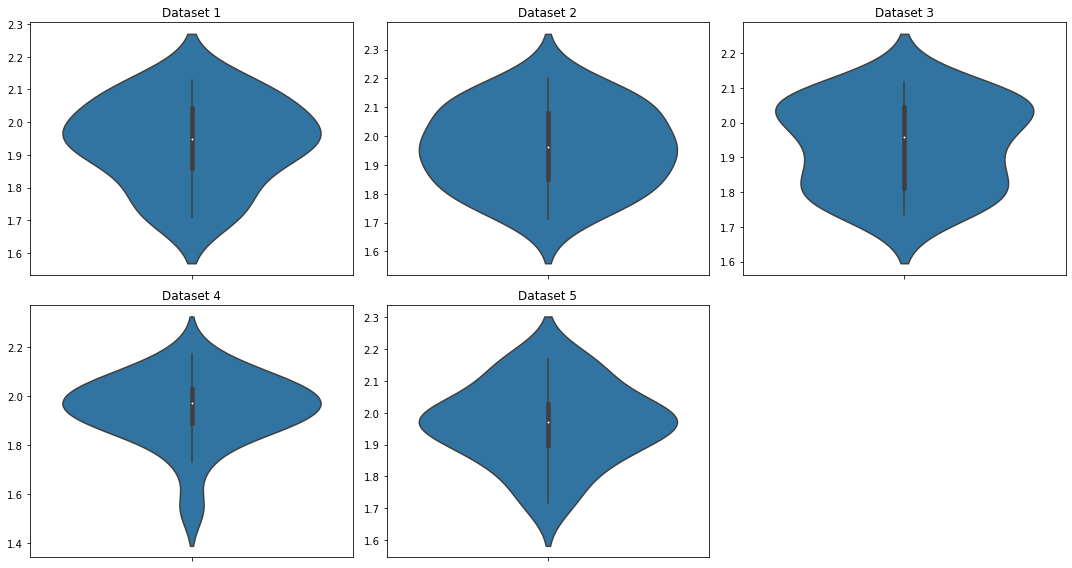

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


data = li_27

plt.figure(figsize=(15, 8))
for i, dataset in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=dataset)
    plt.title(f'Dataset {i+1}')

plt.tight_layout()
plt.show()



In [270]:
re=[]
snp=[]
vae=[]
#ha= np.load('./gene_conversion_eq/non_eq_tes_R.npy')
ha= np.load('./gene_conversion_eq/gene_conversion_eq_rec_rate.npy')
reject=[]
for i in range(1):
    i=4001
    try:
        op =open('./gene_conversion_eq/'+str(i)+'.rmap')
        op_read =op.read().strip()
        op.close()



        snp.append(ha[i])
        recom=[]

        li_op= op_read.split('\n')

        upper= li_op[-1].split('\t')[1]
        lower= li_op[0].split('\t')[0]
        for j in li_op:
            v_1 = j.split('\t')
            v_2 = (int(v_1[1])-int(v_1[0]))* float(v_1[2])
            vae.append(int(v_1[1])-int(v_1[0]))
            recom.append(v_2)

        re.append(sum(recom)/(int(upper)-int(lower)))

    except:
        reject.append(i)
        continue
    #re.append(sum(recom)/(int(upper)-int(lower)))
    

In [271]:
re

[3.039124841660356e-08]

In [272]:
float(v_1[2])

3.0391248416603577e-08

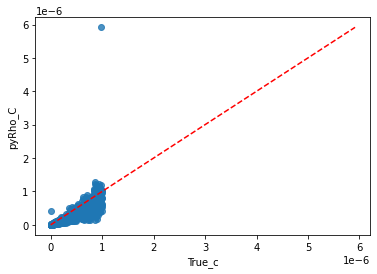

Spearmanr: 0.9343939303016825


In [233]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


    
dic={'True_c':snp, 'pyRho_C':re}

df = pd.DataFrame(dic)

val= np.divide(df['pyRho_C'],df['True_c'])


sns.regplot(x='True_c', y='pyRho_C', data=df)

min_val = min(df['True_c'].min(), df['pyRho_C'].min())
max_val = max(df['True_c'].max(), df['pyRho_C'].max())


plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()


rho, p = spearmanr(dic['True_c'], dic['pyRho_C'])
print('Spearmanr:', rho)


In [223]:
re[1200]/snp[1200]

1.3103858176648625e-13

In [222]:
np.divide(re[1200],snp[1200])

1.3103858176648625e-13

In [229]:
print('Predicted:'+str(re[1200]))
print('True:'+str(snp[1200]))



Predicted:9.967062364117494e-24
True:7.606204393969271e-11


In [67]:
df['True_c']

0       2.287844e-12
1       5.471353e-12
2       7.462977e-12
3       3.047063e-12
4       5.317336e-12
            ...     
5750    2.016010e-07
5751    1.452049e-07
5752    4.454687e-07
5753    5.391222e-07
5754    1.784346e-07
Name: True_c, Length: 5755, dtype: float64

In [203]:
np.exp(re1)

array([[7.86687732e-01],
       [5.14252603e-01],
       [8.89644504e-01],
       [2.95235872e-01],
       [2.25059405e-01],
       [6.31923139e-01],
       [1.11322987e+00],
       [7.28820801e-01],
       [4.07420039e-01],
       [3.24945480e-01],
       [3.94647747e-01],
       [4.79020387e-01],
       [4.35422182e-01],
       [3.39810610e-01],
       [6.40330553e-01],
       [3.25822830e-01],
       [5.29213488e-01],
       [7.73827732e-01],
       [6.01560891e-01],
       [3.82216513e-01],
       [5.37260056e-01],
       [7.60171235e-01],
       [5.02497017e-01],
       [1.80106890e+00],
       [6.76109254e-01],
       [2.86254585e-01],
       [1.07562494e+00],
       [2.16047898e-01],
       [1.05205595e+00],
       [3.32511902e-01],
       [1.42894783e+01],
       [8.92385721e-01],
       [5.77905595e-01],
       [2.14374089e+00],
       [5.04669547e-01],
       [3.25761199e-01],
       [2.87125707e-01],
       [8.16978991e-01],
       [1.27800322e+00],
       [7.48966646e+00],


/tmp/ipykernel_1416457/2902189198.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
/N/u/samishr/Quartz/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


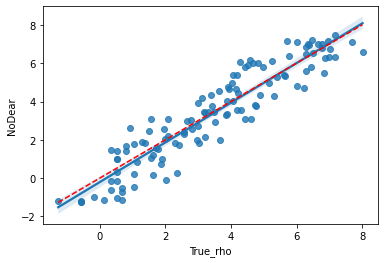

R2 Score: 0.8344043631132481
./non_eq_tes/
Speramanr: 0.9384045623083052
Pearsonr: 0.9317403928335786
101787.07882680983
140.32585958229373


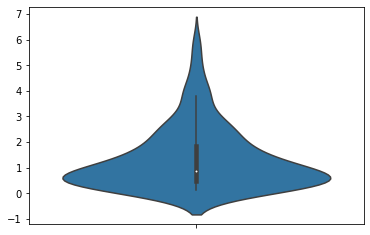

NoDear Mean: 1.3541385007160238
NoDear variance: 1.4932289394763627


/tmp/ipykernel_1416457/1255259936.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_1416457/2902189198.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
/N/u/samishr/Quartz/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


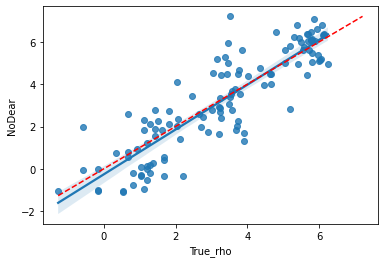

R2 Score: 0.664963593196181
./eq_tes/
Speramanr: 0.8675596301785419
Pearsonr: 0.8790247677361931
40092.63849642934
92.34428340257396


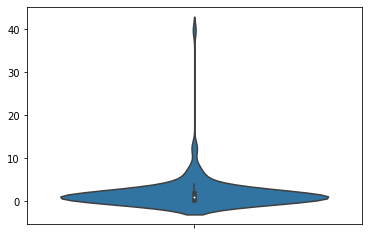

NoDear Mean: 1.9301594380362177
NoDear variance: 16.515498085949158


/tmp/ipykernel_1416457/1255259936.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_1416457/2902189198.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
/N/u/samishr/Quartz/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


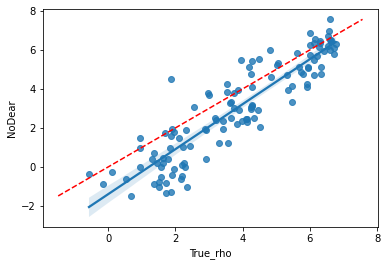

R2 Score: 0.49920531616980235
./gene_conversion_eq/
Speramanr: 0.907648847590339
Pearsonr: 0.9034939782925708
33183.380352615255
94.97243275856754


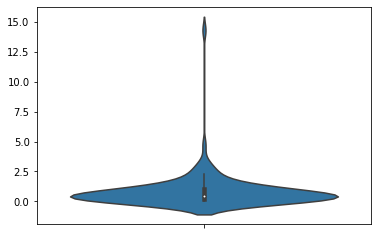

NoDear Mean: 0.8303672579848498
NoDear variance: 2.1386355565374573


/tmp/ipykernel_1416457/1255259936.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_1416457/2902189198.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
/N/u/samishr/Quartz/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


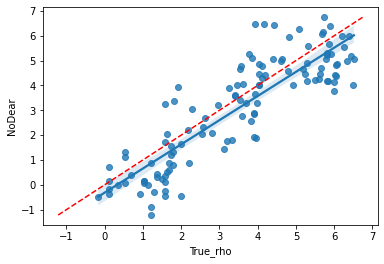

R2 Score: 0.6490935813443528
./pop_split/
Speramanr: 0.8638008575702578
Pearsonr: 0.8698860213731924
32460.070651789007
98.96504454363185


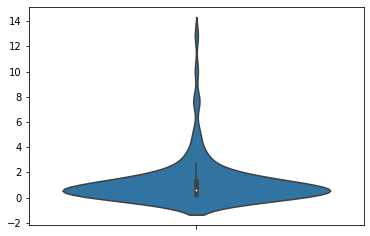

NoDear Mean: 1.2336612937870843
NoDear variance: 3.533633295658966


/tmp/ipykernel_1416457/1255259936.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


<Figure size 432x288 with 0 Axes>

In [103]:
folder= ['./non_eq_tes/','./eq_tes/','./gene_conversion_eq/','./pop_split/']
#results_df = pd.DataFrame(columns=['Folder', 'R2_Score', 'Pearson_Correlation', 'Spearman_Correlation','Mean ratio','Variance ratio'])
#from sklearn.metrics import mean_squared_error
#results_df = pd.DataFrame(columns=['Folder', 'R2_Score', 'Pearson_Correlation', 'Spearman_Correlation','Mean_square_error','Mean ratio','Variance ratio'])
from sklearn.metrics import mean_squared_error,mean_absolute_error
results_df = pd.DataFrame(columns=['Folder', 'R2_Score', 'Pearson_Correlation', 'Spearman_Correlation','Mean_square_error','Mean_absolute_error','Mean ratio','Variance ratio'])
result_11={}

for fol in folder:
    re1=[]
    R1=[]
    ha1= np.load(fol+fol[2:-1]+'_rate.npy')
    entro=[]
    reject=[]
    re2=[]
    for i in range(120):
        if i not in reject:
            ha= np.load(fol+str(i)+'_haps.npy')
            R1.append(ha1[i])
            entro.append(make_shannon(ha))
            re1.append(np.exp(predit(ha,model)[0]))
            re2.append(predit(ha,model)[0])


    dic={'True_rho':np.divide(R1,1), 'NoDear':np.divide(re1,1)}
    dic1={'True_rho':np.log(R1), 'NoDear':re2}


    df = pd.DataFrame(dic1)

    df1 = pd.DataFrame(dic)

    val1= np.divide(df1['NoDear'],df1['True_rho'])
    #plt.clf()
    pd.DataFrame(dic).to_csv('noDear_conv.csv', index=False)
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import spearmanr,pearsonr
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error as MSE



    sns.regplot(x='True_rho', y='NoDear', data=df)
    min_val = min(df['True_rho'].min(), df['NoDear'].min())
    max_val = max(df['True_rho'].max(), df['NoDear'].max())


    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
    plt.show()
    plt.clf()
    r2= r2_score(df['True_rho'], df['NoDear'])
    print("R2 Score:",r2)
    #print("R2 Score:",r2_score(y_values2, y_values1))
    #print("MSE:",MSE(y_values2, y_values1))
    rho_sp, p = spearmanr(dic['True_rho'], dic['NoDear'])
    print(fol)
    print('Speramanr:',rho_sp)
    rho_pr, p = pearsonr(df['True_rho'], df['NoDear'])
    print('Pearsonr:',rho_pr)
    loss = mean_squared_error(df1['True_rho'], df1['NoDear'])
    print(loss)
    abs_loss =mean_absolute_error(df1['True_rho'], df1['NoDear'])
    print(abs_loss)
    sns.violinplot(y=val1)
    plt.show()
    plt.clf()
    result_11[fol]=[[[re2[i*40:40*(i+1)] for i in range(3)],[dic1['True_rho'][i*40:40*(i+1)] for i in range(3)]],[val1[i*40:40*(i+1)] for i in range(3)]]

    
    print('NoDear Mean:',val1.mean())
    print('NoDear variance:',val1.var())
    results_df = results_df.append({
        'Folder': fol,
        'R2_Score': r2,
        'Pearson_Correlation': rho_pr,
        'Spearman_Correlation': rho_sp,
        'Mean_square_error':loss,
        'Mean_absolute_error':abs_loss,
        'Mean ratio': val1.mean(),
        'Variance ratio':val1.var()
    }, ignore_index=True)
results_df.to_csv('NoDear_results_c_partial_data.csv', index=False)
    
    


In [131]:
folder= ['./non_eq_tes/','./eq_tes/','./gene_conversion_eq/','./pop_split/']
import matplotlib.pyplot as plt
import seaborn as sns
data_r2=[]
data_spearman=[]
data_pearson=[]
for fol in folder:
    print(fol)
    split_plot=result_11[fol][0]
    ratio=result_11[fol][1]


    print('ratio for bin[3,4,5]:','mean',np.mean(ratio,axis=1),'variance',np.var(ratio,axis=1))
    
    for kk in range(3):
        #print('bin',kk)

            
        r2= r2_score(split_plot[1][kk],split_plot[0][kk])
        #print("R2 Score:",r2)
        #print("R2 Score:",r2_score(y_values2, y_values1))
        #print("MSE:",MSE(y_values2, y_values1))
        rho_sp, p = spearmanr(split_plot[1][kk],split_plot[0][kk])
        #print('Speramanr:',rho_sp)
        rho_pr, p = pearsonr(split_plot[1][kk],split_plot[0][kk])
        #print('Pearsonr:',rho_pr)
        if len(data_r2)!=3:
            data_r2.append([r2])
            data_spearman.append([rho_sp])
            data_pearson.append([rho_pr])
        else:
            data_r2[kk]+=[r2]
            data_spearman[kk]+=[rho_sp]
            data_pearson[kk]+=[rho_pr]
      

   



./non_eq_tes/
ratio for bin[3,4,5]: mean [1.12388827 1.68804372 1.25048352] variance [0.92829338 2.26916534 1.06964516]
./eq_tes/
ratio for bin[3,4,5]: mean [1.59143235 2.80369206 1.39535391] variance [ 5.89971404 41.00252283  1.0675577 ]
./gene_conversion_eq/
ratio for bin[3,4,5]: mean [0.77099301 0.92843222 0.79167655] variance [4.89045145 1.15570268 0.30164764]
./pop_split/
ratio for bin[3,4,5]: mean [1.0276182  1.87730595 0.79605974] variance [2.30365296 6.93169547 0.62898331]


In [126]:
for fol in folder:
    print(np.mean(result_11[fol][1],axis=1)
    
    

SyntaxError: incomplete input (994897310.py, line 4)

In [118]:
r2_score(df['True_rho'][:120],df['NoDear'][:120])

0.6490935813443528

In [109]:
[np.log(R1)[i*40:40*(i+1)] for i in range(3)]

[array([ 0.52544878,  2.16767652,  1.21859597,  1.50627804,  0.11998368,
         1.56690266,  1.13158459,  1.99178585,  1.72942159,  1.56690266,
         1.21859597,  1.67812829,  0.34312723,  1.67812829,  1.56690266,
         0.67959946,  0.93091389,  0.52544878,  1.37274665,  1.03627441,
         1.03627441,  1.37274665,  1.03627441,  1.56690266,  1.62406107,
         1.82473177,  1.99178585,  1.56690266,  0.11998368,  1.29863867,
         1.77821175,  1.21859597,  1.72942159,  1.62406107,  1.91174315,
         0.11998368,  1.56690266, -0.1676984 ,  0.11998368,  0.52544878]),
 array([2.58383692, 4.03200668, 3.41582054, 3.18803661, 3.45218819,
        3.53771036, 4.04689529, 3.25547789, 1.77821175, 3.81509368,
        3.31865679, 3.77711443, 3.99118469, 3.62403844, 4.18472777,
        3.92107512, 2.54035181, 3.56997122, 2.96779582, 2.28903738,
        3.8456771 , 4.11358667, 2.19942522, 3.69653395, 2.79413233,
        4.04195701, 2.62550961, 3.92107512, 4.04689529, 4.42066467,
      

In [590]:
results_df

,Folder,R2_Score,Pearson_Correlation,Spearman_Correlation,Mean_square_error,Mean_absolute_error,Mean ratio,Variance ratio
0,./non_eq_tes/,0.848637,0.92438,0.934508,139301.349908,142.811762,1.1911,1.110854
1,./eq_tes/,0.767227,0.886276,0.873974,9701.10709,54.103736,1.405103,2.991338
2,./gene_conversion_eq/,0.623189,0.911079,0.905666,40735.968515,111.899416,0.610887,0.398743
3,./pop_split/,0.704589,0.869592,0.854455,23177.726915,84.428302,1.069829,1.339148


In [563]:
re1

[2.8814207e-10,
 1.8086866e-09,
 2.423549e-11,
 5.5435423e-10,
 4.075167e-10,
 2.3498762e-11,
 1.528076e-11,
 7.351772e-12,
 1.608881e-10,
 3.6303106e-11,
 2.367936e-11,
 3.653797e-11,
 1.3444184e-11,
 7.5522893e-11,
 5.683789e-10,
 2.81405e-10,
 7.315366e-11,
 1.1449592e-10,
 1.9313016e-10,
 1.9303581e-11,
 3.4939534e-11,
 2.0368518e-10,
 7.345916e-11,
 4.5433275e-09,
 1.4165925e-09,
 3.1458527e-09,
 8.1510054e-10,
 6.524092e-11,
 1.7194555e-11,
 9.520584e-11,
 1.5871675e-10,
 3.5234213e-10,
 1.2726283e-09,
 2.0038587e-10,
 1.2717087e-09,
 2.825445e-11,
 7.086942e-11,
 1.4214142e-11,
 1.5408336e-11,
 2.3150439e-10,
 5.974401e-10,
 5.24268e-09,
 1.0780096e-09,
 2.2634927e-09,
 6.8496746e-09,
 4.6495817e-08,
 1.00586725e-07,
 7.2644966e-09,
 1.508987e-10,
 1.0976017e-09,
 1.7382727e-09,
 1.385066e-07,
 2.3843856e-09,
 1.8915014e-08,
 3.0058743e-08,
 3.2224576e-09,
 4.8313104e-10,
 2.4892024e-08,
 1.4790402e-08,
 2.662507e-09,
 1.673972e-08,
 2.7322118e-08,
 4.1115414e-10,
 3.3662015e-08

In [193]:
def np_har(n):
    su_ = []
    for i in range(1, n, 1):
        su_.append(1 / i)
    return sum(su_)
d=np_har(20)

In [197]:
d

3.547739657143682

In [163]:
entrop_=[]
for i in range(6000):
    ha= np.load('./gene_conversion_eq/'+str(i)+'_haps.npy')
    entrop_.append(ha)





In [164]:
entrop_

[array([[0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1]], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 1],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0]], dtype=int32),
 array([[0, 1, 0, ..., 1, 0, 1],
        [0, 1, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 0, 0

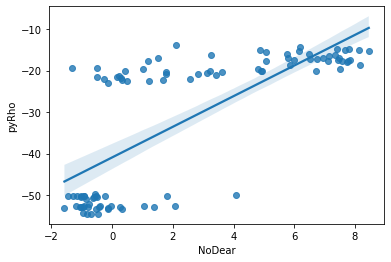

Speramanr: 0.7887267371803452


In [52]:
dic={'NoDear':re1, 'pyRho':re}
pd.DataFrame(dic).to_csv('R_conv.csv', index=False)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

df = pd.DataFrame(dic)
df['NoDear'] = df['NoDear'].astype(float)
sns.regplot(x='NoDear', y='pyRho', data=df)

plt.show()
#print("R2 Score:",r2_score(y_values2, y_values1))
#print("MSE:",MSE(y_values2, y_values1))
rho, p = spearmanr(dic['NoDear'], dic['pyRho'])
print('Speramanr:',rho)


In [50]:
re1=[]
R1=[]
ha1= np.load('./non_eq_tes/non_eq_tes_R.npy')
for i in range(100):
    ha= np.load('./non_eq_tes/'+str(i)+'_haps.npy')
    re1.append(predit(ha,model))
    R1.append(ha1[i])
    
    

/tmp/ipykernel_3996657/1022692212.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


[0.39534884 0.09302326 0.09302326 0.09302326 0.02325581 0.11627907
 0.06976744 0.02325581 0.06976744 0.02325581 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.38888889 0.11111111 0.11111111 0.08333333 0.11111111 0.05555556
 0.05555556 0.08333333 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.28571429 0.14285714 0.0952381  0.02380952 0.         0.0952381
 0.07142857 0.11904762 0.14285714 0.02380952 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.25641026 0.17948718 0.12820513 0.17948718 0.07692308 0.02564103
 0.07692308 0.07692308 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.325 0.175 0.075 0.025 0.075 0.05  0.1   0.075 0.1   0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]
[0.25714286 0.11428571 0.14285714 0.08571429 0.2        0.05714286
 0.05714286 0.05714286 0.   

[0.22857143 0.14285714 0.14285714 0.11428571 0.02857143 0.11428571
 0.08571429 0.08571429 0.05714286 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.375   0.15625 0.03125 0.09375 0.0625  0.      0.03125 0.0625  0.0625
 0.125   0.      0.      0.      0.      0.      0.      0.      0.
 0.     ]
[0.57894737 0.02631579 0.07894737 0.05263158 0.10526316 0.05263158
 0.02631579 0.02631579 0.02631579 0.02631579 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.21621622 0.18918919 0.10810811 0.10810811 0.13513514 0.05405405
 0.05405405 0.10810811 0.         0.02702703 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.17241379 0.20689655 0.10344828 0.06896552 0.10344828 0.06896552
 0.06896552 0.03448276 0.13793103 0.03448276 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.24074074 0.33333333 0.07407407 0.03703704 0.14814815 0.

In [51]:
dic1={'R':R1,'log_rho':re1}
pd.DataFrame(dic1).to_csv('R_rho.csv', index=False)


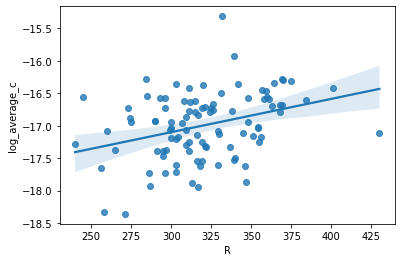

Speramanr: 0.34329258692423037


In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

df = pd.DataFrame(dic)

sns.regplot(x='R', y='log_average_c', data=df)

plt.show()
#print("R2 Score:",r2_score(y_values2, y_values1))
#print("MSE:",MSE(y_values2, y_values1))
rho, p = spearmanr(dic['R'], dic['log_average_c'])
print('Speramanr:',rho)


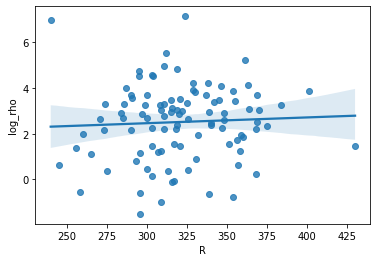

Spearmanr: 0.08424906321384244


In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Assuming dic1 is defined correctly and has numeric data
df = pd.DataFrame(dic1)
df['log_rho'] = df['log_rho'].astype(float)

# Plotting
sns.regplot(x='R', y='log_rho', data=df)
plt.show()

# Spearman's Correlation
# Make sure dic1 is the correct dictionary and has 'R' and 'log_rho' keys with numeric values
if 'R' in dic1 and 'log_rho' in dic1:
    rho, p = spearmanr(dic1['R'], dic1['log_rho'])
    print('Spearmanr:', rho)
else:
    print("Error: Data not found in the dictionary")


NoDear Dataset:1 mean: 0.4632806 Variance: 0.03432348
NoDear Dataset:2 mean: 0.4886145 Variance: 0.03410737
NoDear Dataset:3 mean: 0.54429656 Variance: 0.059111815
NoDear Dataset:4 mean: 0.58594567 Variance: 0.4301091
NoDear Dataset:5 mean: 0.63969207 Variance: 0.14942902
NoDear Dataset:6 mean: 0.63752687 Variance: 0.32215288


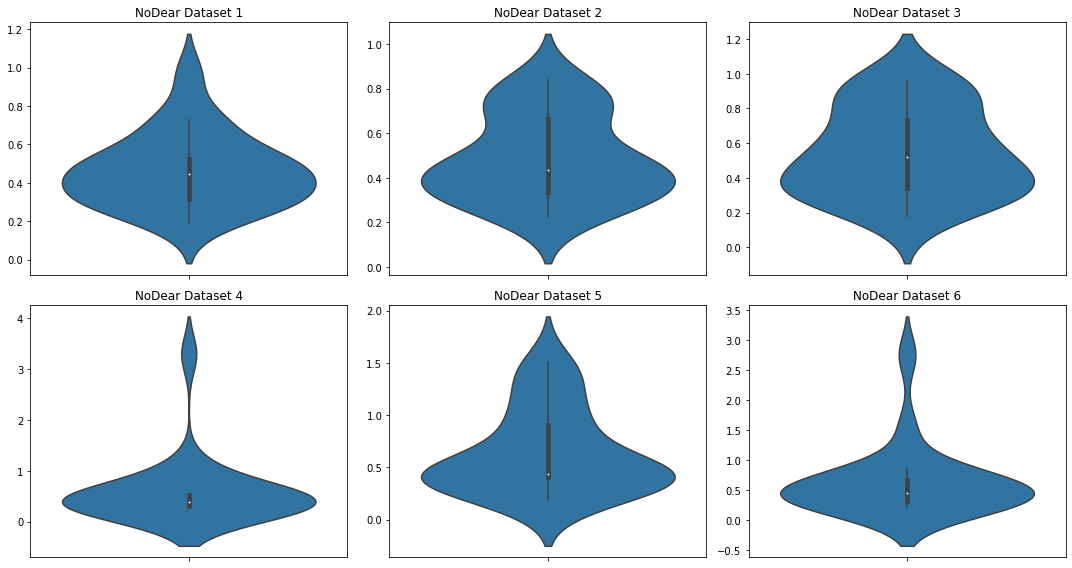

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


val2 = [re[i*20:20*(i+1)] for i in range(6)]
val12 = [re1[i*20:20*(i+1)] for i in range(6)]

#data = [val2]
labels = ['pyrho', 'NoDear']

data = val12
# Create a violin plot for each dataset
plt.figure(figsize=(15, 8))
for i, dataset in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=dataset)
    plt.title(f'NoDear Dataset {i+1}')
    print(f'NoDear Dataset:'+str(i+1) +' mean:', np.mean(dataset), 'Variance:', np.var(dataset))

plt.tight_layout()
plt.show()






In [186]:
val12

[0     0.189467
 1     0.525180
 2     0.092342
 3     0.963413
 4     1.177745
 5     0.362460
 6    -0.187146
 7     0.551897
 8     0.709076
 9     0.887695
 10    0.734229
 11    0.581226
 12    0.656584
 13    1.883175
 14    0.352023
 15    0.885566
 16    0.502533
 17    0.202483
 18    0.886706
 19    0.759504
 dtype: float64,
 20     1.083937
 21     0.216544
 22     4.103591
 23    -0.464641
 24     0.309087
 25     0.987809
 26    -0.057570
 27     9.136970
 28    -0.088537
 29     0.869518
 30   -15.858968
 31     0.678938
 32     3.269827
 33    -1.330427
 34     0.540034
 35     1.956842
 36     0.985410
 37     0.352677
 38    -0.193711
 39   -12.006819
 dtype: float64,
 40    2.454976
 41   -0.310788
 42    0.629129
 43    0.429412
 44    0.661790
 45    1.065962
 46   -0.476678
 47   -0.948238
 48    1.264619
 49    0.717178
 50    0.760253
 51    0.471797
 52    1.752809
 53   -0.834668
 54    1.375173
 55    0.660603
 56    0.739371
 57   -1.020202
 58    0.966269
 5

In [147]:
def model_it(train_x,test_x,train_y,test_y,whole_x,whole_y,flag,file_):
    import seaborn as sns
    from scipy.stats import spearmanr,pearsonr
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error as MSE
    import xgboost
    results_df = pd.DataFrame(columns=['Folder', 'R2_Score', 'Pearson_Correlation', 'Spearman_Correlation','Mean_square_error','Cross_Validation_score'])

    model = xgboost.XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    cv = KFold(n_splits=5,  shuffle=True)

    score = cross_val_score(model, pd.DataFrame(whole_x), whole_y,scoring='r2',cv=cv)
    
    
    model.fit(pd.DataFrame(train_x), train_y)
    pred = model.predict(pd.DataFrame(test_x))
    
    pred_df= pd.DataFrame(pred)
    true_df = pd.DataFrame(test_y)
    frames = [true_df, pred_df]


    result =pd.concat([true_df,pred_df], ignore_index=True,axis=1)
    sns.scatterplot(data=result,x=0,y=1)
    
    if flag==1:
        plt.xlabel("True rho")
        plt.ylabel("Predicted rho")
        plt.savefig('NoDear_traning_rho_partial_data'+file_+'.png')
    else:
        plt.xlabel("True c")
        plt.ylabel("Predicted c")
        plt.savefig('NoDear_traning_c_partial_data'+file_+'.png')

    # Show the plot
    plt.show()
    plt.clf()
    print("R2 Score:",r2_score(true_df, pred_df))
    print("MSE:",MSE(true_df, pred_df))
    rho_sp, p = spearmanr(pred_df,true_df)
    print('Speramanr:',rho_sp)
    rho_pr, p = pearsonr(pred,test_y)
    print('Pearsonr:',rho_pr)
    print('Cross Validation score:',score)
    results_df = results_df.append({
        'Folder': file_,
        'R2_Score': r2_score(true_df, pred_df),
        'Pearson_Correlation': rho_pr,
        'Spearman_Correlation': rho_sp,
        'Mean_square_error':MSE(true_df, pred_df),
        'Cross_Validation_score': score
    }, ignore_index=True)
    if flag==1:
        results_df.to_csv('NoDear_traning_rho_partial_data'+file_+'.csv', index=False)
    else:
        results_df.to_csv('NoDear_traning_c_partial_data'+file_+'.csv', index=False)

    return model

In [14]:
nTa =np.load('./train_50k/train_50k_rec_rate.npy',allow_pickle=True)
nTa= nTa[1000:12000]


In [464]:
nTa1 =np.load('./non_eq_train/non_eq_train_rate.npy',allow_pickle=True)
nTa2 =[]

for i in range(6000):
    hap= np.load('./non_eq_train/'+str(i)+'_haps.npy')
    nTa2.append(len(hap))




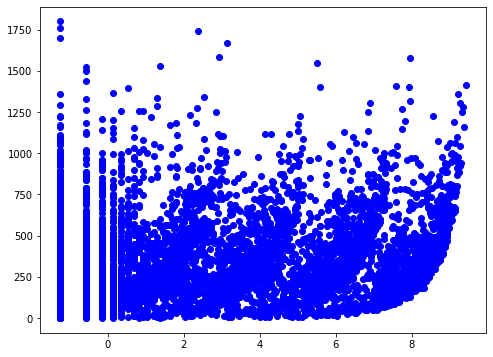

In [481]:
nTa2= np.array(nTa2)
plt.figure(figsize=(8, 6))
plt.scatter(np.log(nTa1), nTa2, color='blue')

In [523]:
np.argmax(nTa2)
data=[]
for k in range(6000):
    data.append(np.max(pd.read_csv('./non_eq_train/'+str(k)+'.csv')['x']))







Text(0, 0.5, 'number of SNP')

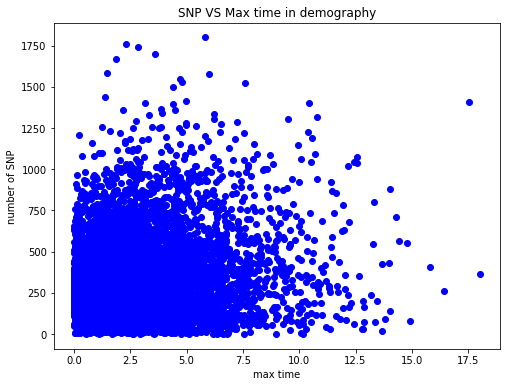

In [524]:
nTa2= np.array(nTa2)
plt.figure(figsize=(8, 6))
plt.scatter(data, nTa2, color='blue')

plt.title("SNP VS Max time in demography")

plt.xlabel('max time')

plt.ylabel('number of SNP')

In [517]:
plt.figure(figsize=(10, 6))

plt.plot(data['x'], data['y'], label='history')
    #plt.plot(data1['x'], data1['y'], label='Population history for min SNP')

plt.title("max_min")

plt.xlabel('Time')

plt.ylabel('Population')

plt.legend()

plt.grid(True)

plt.show()

,label,x,y,plot_type,plot_num
0,ABC,0,70000,path,0


In [525]:
pd.read_csv('./non_eq_train/'+str(k)+'.csv')

,label,x,y,plot_type,plot_num
0,ABC,0.000000,70000.000000,path,0
1,ABC,3.408626,93765.959833,path,0
2,ABC,3.875129,96864.864619,path,0
3,ABC,4.187351,38236.519257,path,0


50k


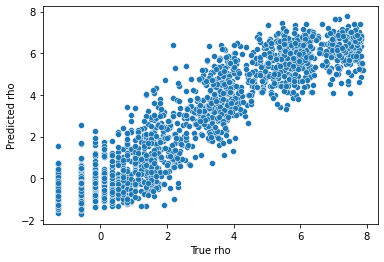

R2 Score: 0.8832381466511828
MSE: 1.0058363887013664
Speramanr: 0.9039187611731235
Pearsonr: 0.939981085898405
Cross Validation score: [0.88981743 0.88150567 0.88551092 0.89203098 0.88945003]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


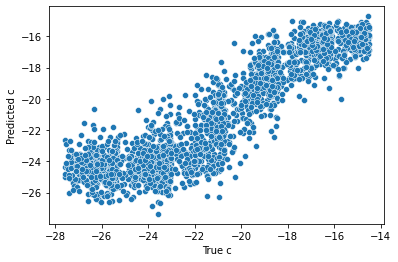

R2 Score: 0.836212683987727
MSE: 2.203389841491197
Speramanr: 0.8947776976437769
Pearsonr: 0.914567026851334
Cross Validation score: [0.82912134 0.81396828 0.82636692 0.81862957 0.83896574]
-----------------------------------------------------------------------------------------
10k


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


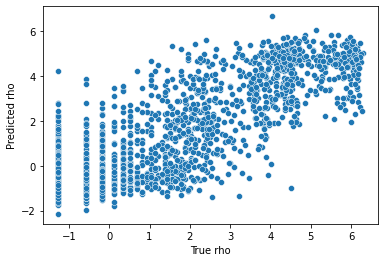

R2 Score: 0.6937563341794383
MSE: 1.7514890772143894
Speramanr: 0.7645771629248493
Pearsonr: 0.8348288814186624
Cross Validation score: [0.73003322 0.70730965 0.73074938 0.70189295 0.70447373]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


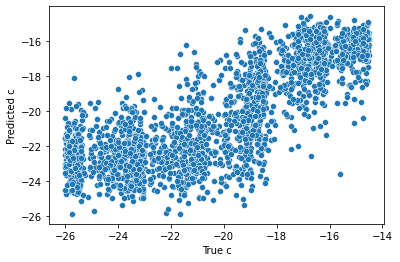

R2 Score: 0.6184554120582206
MSE: 4.3106013867619675
Speramanr: 0.7611729342932335
Pearsonr: 0.7885196915256918
Cross Validation score: [0.60682952 0.61909913 0.6275181  0.60694292 0.59828493]
-----------------------------------------------------------------------------------------
25k


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


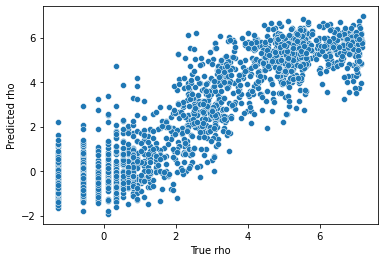

R2 Score: 0.8450242512721663
MSE: 1.169611251509333
Speramanr: 0.8773229520257965
Pearsonr: 0.9194952037307501
Cross Validation score: [0.83621086 0.84841035 0.83119065 0.83730051 0.83628341]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


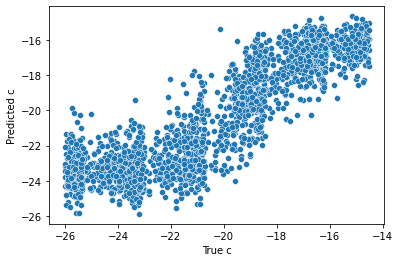

R2 Score: 0.7827004056269449
MSE: 2.448737614732667
Speramanr: 0.8622438295609572
Pearsonr: 0.8853842153291788
Cross Validation score: [0.77046985 0.77083227 0.77132025 0.78176697 0.76663089]
-----------------------------------------------------------------------------------------
75k


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


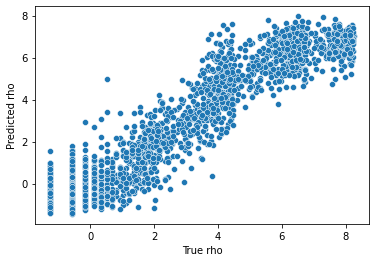

R2 Score: 0.8902180759667694
MSE: 0.9846247714398917
Speramanr: 0.9263551122528758
Pearsonr: 0.943611983361158
Cross Validation score: [0.88622694 0.8943733  0.89459764 0.89388049 0.89212886]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


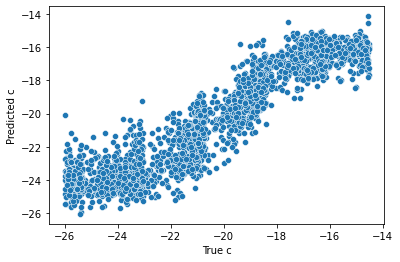

R2 Score: 0.8626662680966747
MSE: 1.521737662534441
Speramanr: 0.9197470954367738
Pearsonr: 0.9289435007373166
Cross Validation score: [0.86154404 0.86548994 0.86068839 0.86481344 0.86223262]
-----------------------------------------------------------------------------------------
100k


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


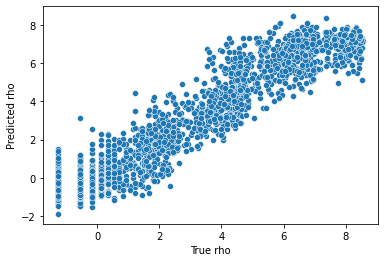

R2 Score: 0.8983069118589839
MSE: 0.927883436785957
Speramanr: 0.9378575272058863
Pearsonr: 0.9477968796234253
Cross Validation score: [0.89505627 0.90015594 0.89150145 0.90065636 0.90811429]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


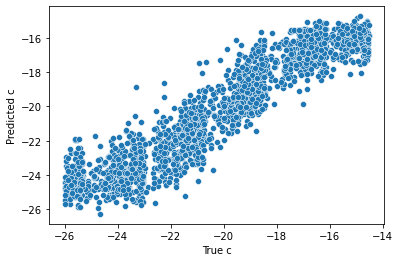

R2 Score: 0.8820098316922517
MSE: 1.306904601992233
Speramanr: 0.9334440747110602
Pearsonr: 0.9392893163577363
Cross Validation score: [0.8788952  0.87382176 0.88436268 0.87598677 0.8714277 ]


/tmp/ipykernel_1416457/1565970162.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


'\nX_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(lis_train_10k, logit_(train_target_un_10k), test_size=0.2)\nmodel_it(X_train_10k, X_test_10k, y_train_10k, y_test_10k,lis_train_10k, logit_(train_target_un_10k))\n\nX_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(lis_train_5k, logit_(train_target_un_5k), test_size=0.2)\nmodel_it(X_train_5k, X_test_5k, y_train_5k, y_test_5k,lis_train_5k, logit_(train_target_un_5k))\n\nX_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(lis_train_1k, logit_(train_target_un_1k), test_size=0.2)\nmodel_it(X_train_1k, X_test_1k, y_train_1k, y_test_1k,lis_train_1k, logit_(train_target_un_1k))\n'

<Figure size 432x288 with 0 Axes>

In [148]:
from sklearn.model_selection import train_test_split
'''
X_train_150k, X_test_150k, y_train_150k, y_test_150k = train_test_split(lis_train_150k, logit_(train_target_un_150k), test_size=0.2)


#print(X_train_150k, X_test_150k, y_train_150k, y_test_150k )
model_it(X_train_150k, X_test_150k, y_train_150k, y_test_150k,lis_train_150k, logit_(train_target_un_150k))


X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(lis_train_100k, logit_(train_target_un_100k), test_size=0.2)
model_it(X_train_100k, X_test_100k, y_train_100k, y_test_100k,lis_train_100k, logit_(train_target_un_100k))
'''
#X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(lis_train_50, (train_target_z_50k), test_size=0.2)
#model=model_it(X_train_50k, X_test_50k, y_train_50k, y_test_50k,lis_train_50k, (train_target_z_50k))


print('50k')
nTa =np.load('./train_50k/train_50k_rec_rate.npy',allow_pickle=True)
nTa= nTa[1000:12000]
X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(lis_train_50k, logit_(train_target_un_50k), test_size=0.2)
model=model_it(X_train_50k, X_test_50k, y_train_50k, y_test_50k,lis_train_50k, logit_(train_target_un_50k),1,'50k')


X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(lis_train_50k, logit_(nTa), test_size=0.2)
model1=model_it(X_train_50k, X_test_50k, y_train_50k, y_test_50k,lis_train_50k, logit_(nTa),0,'50k')

print('-----------------------------------------------------------------------------------------')
print('10k')

nTa =np.load('./train_10k/train_10k_rec_rate.npy',allow_pickle=True)

X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(lis_train_10k, logit_(train_target_un_10k), test_size=0.2)
model=model_it(X_train_10k, X_test_10k, y_train_10k, y_test_10k,lis_train_10k, logit_(train_target_un_10k),1,'10k')


X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(lis_train_10k, logit_(nTa), test_size=0.2)
model1=model_it(X_train_10k, X_test_10k, y_train_10k, y_test_10k,lis_train_10k, logit_(nTa),0,'10k')

print('-----------------------------------------------------------------------------------------')

print('25k')
nTa =np.load('./train_25k/train_25k_rec_rate.npy',allow_pickle=True)

X_train_25k, X_test_25k, y_train_25k, y_test_25k = train_test_split(lis_train_25k, logit_(train_target_un_25k), test_size=0.2)
model=model_it(X_train_25k, X_test_25k, y_train_25k, y_test_25k,lis_train_25k, logit_(train_target_un_25k),1,'25k')


X_train_25k, X_test_25k, y_train_25k, y_test_25k = train_test_split(lis_train_25k, logit_(nTa), test_size=0.2)
model1=model_it(X_train_25k, X_test_25k, y_train_25k, y_test_25k,lis_train_25k, logit_(nTa),0,'25k')

print('-----------------------------------------------------------------------------------------')
print('75k')
nTa =np.load('./train_75k/train_75k_rec_rate.npy',allow_pickle=True)


X_train_75k, X_test_75k, y_train_75k, y_test_75k = train_test_split(lis_train_75k, logit_(train_target_un_75k), test_size=0.2)
model=model_it(X_train_75k, X_test_75k, y_train_75k, y_test_75k,lis_train_75k, logit_(train_target_un_75k),1,'75k')


X_train_75k, X_test_75k, y_train_75k, y_test_75k = train_test_split(lis_train_75k, logit_(nTa), test_size=0.2)
model1=model_it(X_train_75k, X_test_75k, y_train_75k, y_test_75k,lis_train_75k, logit_(nTa),0,'75k')

print('-----------------------------------------------------------------------------------------')
print('100k')

nTa =np.load('./train_100k/train_100k_rec_rate.npy',allow_pickle=True)


X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(lis_train_100k, logit_(train_target_un_100k), test_size=0.2)
model=model_it(X_train_100k, X_test_100k, y_train_100k, y_test_100k,lis_train_100k, logit_(train_target_un_100k),1,'100k')


X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(lis_train_100k, logit_(nTa), test_size=0.2)
model1=model_it(X_train_100k, X_test_100k, y_train_100k, y_test_100k,lis_train_100k, logit_(nTa),0,'100k')

'''
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(lis_train_10k, logit_(train_target_un_10k), test_size=0.2)
model_it(X_train_10k, X_test_10k, y_train_10k, y_test_10k,lis_train_10k, logit_(train_target_un_10k))

X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(lis_train_5k, logit_(train_target_un_5k), test_size=0.2)
model_it(X_train_5k, X_test_5k, y_train_5k, y_test_5k,lis_train_5k, logit_(train_target_un_5k))

X_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(lis_train_1k, logit_(train_target_un_1k), test_size=0.2)
model_it(X_train_1k, X_test_1k, y_train_1k, y_test_1k,lis_train_1k, logit_(train_target_un_1k))
'''


In [ ]:
y_test_50k

In [22]:

import msprime as msp
tsa = msp.sim_ancestry(samples=20,ploidy=1,population_size=70000,sequence_length=50000,recombination_rate=10e-9,model=msp.StandardCoalescent())
ts= msp.sim_mutations(tsa,rate=1e-8,model="jc69")

In [119]:
math.exp(1.4523538114269394)

4.273160901840407

In [15]:
print(len(ts.genotype_matrix()))

252


In [18]:
def np_har(n):
    su_=[]
    for i in range(1,n,1):
        su_.append(1/i)
    return sum(su_)

In [106]:
np_har(20)

3.547739657143682

In [74]:
print(ts.num_sites)

250


In [73]:
print(((ts.num_trees)/np_har(20))/(ts.num_sites))

0.23226056014025842


In [54]:


# the actual haplotype strings
haps = []
for i in ts.haplotypes():
    haps.append(i)

# The ">ID" parts of the fasta format. Don't know what best info to include is, 
# I'm just using sample index and the population because that's relevant for me. 
# Possibly people could choose what to include for ID strings in a fasta output function call
sequence_IDs = []
for i in range(len(haps)):
    sequence_IDs.append(f'sample_{ts.samples()[i]}_pop_{ts.node(i).population}')

# saving the file
with open('Sim_fasta_file.txt', 'w') as f:
    for i in range(len(haps)):
        f.write(f'>{sequence_IDs[i]}\n{haps[i]}\n') 

In [17]:
def predit(H,model):
    #H= ts.genotype_matrix()
    lis=[]

    for i in H:
        co = dict(Counter(i))
        if len(co.keys())==2:
                lis.append(co[min(co,key=co.get)]/len(i))
    bins = np.linspace(0, 1, 20)

    bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
    bins= bins[1:]
    bin_means= bin_means/bin_means.sum()


    pred = model.predict(pd.DataFrame([bin_means[:10]]))
    return pred
    

In [168]:
pd.DataFrame(pred_hu).to_csv('Fin.csv',index=False)

In [418]:

oep =open('url_list_fin.txt')
oep_r =oep.read()
oep.close()
url=[]
for ie in oep_r.strip().split('\n'):
    url.append(ie.split(' 	')[0])


urls = []
chromosome_names = []

for ii in url:
    chromosome_names.append(ii.split('chr')[1].split('.')[0])
chromosome_names

['6',
 'Y',
 'Y',
 '14',
 '19',
 '20',
 '4',
 'Y',
 '12',
 '18',
 '2',
 '10',
 '16',
 '21',
 '4',
 'MT',
 '15',
 '1',
 '21',
 '5']

In [289]:

import pysam
import numpy as np
import os
import math


os.environ["PATH"] = "/local/bin/bcftools:" + os.environ["PATH"]

for ur in url[:1]:
    pred_hu=[]
    chromosome_names= ur.split('chr')[1].split('.')[0]
    print(chromosome_names)
    if ur[-4:]=='.tbi':
        ur=ur[:-4]
        
    for k in range(175):
        #print(str(k*(50000))+'-'+str((k+1)*50000))
        os.system('tabix -h  	'+ur+' '+chromosome_names+':'+str(k*(50000))+'-'+str((k+1)*50000)+' > ./human_genome/output_'+str(k*(50000))+'_'+str((k+1)*50000)+'.vcf')
        #oe = open('./human_genome/output_'+str(k*(50000))+'_'+str((k+1)*50000



        #oe_r =oe.read().split('##FORMAT=<ID=GL,Number=.')

        #oe_r[1]= '\n'.join(oe_r[1].split('\n')[1:])
        #oe.close()


        #with open('./human_genome/output_'+str(k*(50000))+'_'+str((k+1)*50000), 'w+') as file:
            #file.write(''.join(oe_r))



        #os.system('./bcf.sh')


        # Open the VCF file
        vcf_file = pysam.VariantFile('./human_genome/output_'+str(k*(50000))+'_'+str((k+1)*50000)+'.vcf')

        # Lists to store data
        data = []


        for record in vcf_file:
            basic_info = [record.chrom, record.pos, record.ref, record.alts[0]]
            genotypes = []
            for sample in record.samples:
                genotype = record.samples[sample]['GT']

                genotype_str = [int(allele) if allele is not None else 0 for allele in genotype]

                genotypes+=genotype_str




            data.append(genotypes)


        genotype_array = np.array(data)


        pred_hu.append(math.exp(predit(genotype_array,model)))
    pd.DataFrame(pred_hu).to_csv('fin_'+chromosome_names+'.csv',index=False)

6


/tmp/ipykernel_330465/1022692212.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.6 0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.66666667 0.22222222 0.         0.         0.11111111 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.54545455 0.18181818 0.         0.09090909 0.         0.
 0.         0.09090909 0.09090909 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77463312 0.07756813 0.04926625 0.02410901 0.01991614 0.0115304
 0.00943396 0.00419287 0.00838574 0.02096436 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8172888  0.09037328 0.03339882 0.00982318 0.02554028 0.00785855
 0.00589391 0.00392927 0.00392927 0.00196464 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84210526 0.04511278 0.07518797 0.0075188  0.02255639 0.0037594
 0.         0.         0.0037594  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81930185 0.05954825 0.03285421 0.02053388 0.02053388 0.00616016
 0.01232033 0.01848049 0.00616016 0.00410678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79265403 0.04146919 0.02014218 0.03554502 0.01777251 0.01421801
 0.03672986 0.01303318 0.02014218 0.00829384 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82862524 0.02259887 0.01318267 0.01035782 0.02448211 0.01694915
 0.03295669 0.03013183 0.01600753 0.0047081  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85081241 0.01033973 0.03988183 0.02511078 0.01772526 0.00443131
 0.02067947 0.00738552 0.00886263 0.01477105 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8034076  0.07077326 0.03407602 0.01834862 0.01048493 0.01310616
 0.00655308 0.0249017  0.01048493 0.0078637  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.74054054 0.10810811 0.03783784 0.00540541 0.00945946 0.07027027
 0.01621622 0.00675676 0.00135135 0.00405405 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76824584 0.06017926 0.08322663 0.02432778 0.01408451 0.01792574
 0.01024328 0.01152369 0.00256082 0.00768246 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78143361 0.09048179 0.06815511 0.01527615 0.00235018 0.01292597
 0.01410106 0.01292597 0.00117509 0.00117509 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79052369 0.06982544 0.03491272 0.02493766 0.01620948 0.02244389
 0.01620948 0.01620948 0.00249377 0.00623441 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81935484 0.02967742 0.03612903 0.03096774 0.02064516 0.03612903
 0.00516129 0.00903226 0.00903226 0.00387097 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7616975  0.05223069 0.03264418 0.01632209 0.03808487 0.01305767
 0.02829162 0.01849837 0.03482046 0.00435256 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75949367 0.06329114 0.02761795 0.07249712 0.0264672  0.01495972
 0.01611047 0.00920598 0.00575374 0.00460299 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85012594 0.0302267  0.03526448 0.01763224 0.01259446 0.01511335
 0.00881612 0.01133501 0.01133501 0.00755668 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75147232 0.05300353 0.08716137 0.01531213 0.01531213 0.04122497
 0.01531213 0.01295642 0.00588928 0.00235571 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81214204 0.06643757 0.03894616 0.02749141 0.01718213 0.01947308
 0.0091638  0.00801833 0.00114548 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81067961 0.06674757 0.02063107 0.02184466 0.0315534  0.0157767
 0.01820388 0.00728155 0.00242718 0.00485437 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84275862 0.03724138 0.0137931  0.01793103 0.02482759 0.01655172
 0.02758621 0.01241379 0.00551724 0.00137931 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79665072 0.02751196 0.00956938 0.01674641 0.03947368 0.01674641
 0.04186603 0.03947368 0.00956938 0.00239234 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8002451  0.03308824 0.01470588 0.02083333 0.01348039 0.01838235
 0.04166667 0.02818627 0.01838235 0.01102941 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.74840358 0.09323116 0.04214559 0.03320562 0.01149425 0.01149425
 0.01021711 0.00766284 0.03320562 0.00893997 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79554937 0.08205841 0.02642559 0.03337969 0.00973574 0.01947149
 0.0069541  0.01251739 0.01390821 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.70162297 0.04369538 0.05118602 0.08739076 0.01498127 0.01248439
 0.00998752 0.03745318 0.03620474 0.00499376 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7456847  0.07940161 0.04602992 0.03912543 0.03222094 0.01611047
 0.0023015  0.01380898 0.01726122 0.00805524 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.645   0.0625  0.0975  0.03625 0.02    0.0225  0.01875 0.00125 0.06875
 0.0275  0.      0.      0.      0.      0.      0.      0.      0.
 0.     ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80971129 0.04855643 0.06167979 0.02230971 0.01181102 0.01181102
 0.01312336 0.00656168 0.00918635 0.00524934 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77446103 0.07628524 0.026534   0.00829187 0.02487562 0.013267
 0.03150912 0.02321725 0.01658375 0.00497512 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.72996301 0.0702836  0.05178792 0.01109741 0.01109741 0.06288533
 0.00986436 0.03452528 0.01109741 0.00739827 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76941458 0.04659498 0.05973716 0.03703704 0.01075269 0.01194743
 0.00955795 0.00716846 0.01792115 0.02986858 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8346056  0.02290076 0.02290076 0.00508906 0.01145038 0.0216285
 0.00890585 0.02035623 0.01653944 0.03562341 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.88449848 0.03343465 0.01519757 0.0106383  0.00607903 0.00911854
 0.00759878 0.01367781 0.01215805 0.00759878 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.88130564 0.03560831 0.01038576 0.00296736 0.00593472 0.0074184
 0.02225519 0.01335312 0.01780415 0.00296736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81424581 0.05865922 0.03072626 0.01815642 0.00837989 0.01536313
 0.00977654 0.0377095  0.00698324 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81752874 0.01436782 0.00574713 0.02011494 0.01436782 0.01005747
 0.04022989 0.06178161 0.0158046  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85155196 0.00539811 0.00404858 0.02834008 0.02024291 0.00539811
 0.02834008 0.03238866 0.0242915  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.89466089 0.01587302 0.00577201 0.02886003 0.002886   0.00721501
 0.01731602 0.01587302 0.01154401 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87087518 0.05738881 0.01721664 0.03299857 0.         0.0071736
 0.0143472  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84441088 0.10120846 0.0060423  0.03172205 0.         0.00755287
 0.00906344 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8651363  0.02008608 0.03730273 0.03586801 0.00860832 0.00573888
 0.0143472  0.00860832 0.00430416 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.92       0.01230769 0.00769231 0.02923077 0.00923077 0.
 0.02       0.00153846 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.89784173 0.00719424 0.01870504 0.02877698 0.01582734 0.
 0.02302158 0.0057554  0.0028777  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7767624  0.02610966 0.02480418 0.02872063 0.08224543 0.00652742
 0.01958225 0.00391645 0.0156658  0.0156658  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79007092 0.0141844  0.03546099 0.05106383 0.04822695 0.01843972
 0.00283688 0.00851064 0.0141844  0.01702128 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82352941 0.05147059 0.0122549  0.00612745 0.00245098 0.00735294
 0.01102941 0.04901961 0.02083333 0.01593137 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7940552  0.0552017  0.00636943 0.00318471 0.00955414 0.01698514
 0.02335456 0.0477707  0.03503185 0.00849257 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7312253  0.085639   0.00395257 0.01317523 0.04216074 0.03952569
 0.04479578 0.02503294 0.01449275 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78907243 0.03303685 0.04828463 0.04193139 0.00508259 0.03684879
 0.02160102 0.00508259 0.01016518 0.00889454 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78403141 0.02225131 0.04188482 0.03795812 0.02225131 0.02617801
 0.03141361 0.02094241 0.0117801  0.0013089  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.71299435 0.05762712 0.03615819 0.09830508 0.02824859 0.00451977
 0.01016949 0.00903955 0.03050847 0.01242938 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82051282 0.01098901 0.02564103 0.04761905 0.01587302 0.00854701
 0.01587302 0.03540904 0.01953602 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77647059 0.01699346 0.02222222 0.02875817 0.03137255 0.04183007
 0.00522876 0.02352941 0.0248366  0.02875817 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.795 0.042 0.042 0.015 0.003 0.034 0.027 0.012 0.025 0.005 0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82593857 0.05005688 0.02957907 0.01478953 0.02275313 0.01934016
 0.01251422 0.01592719 0.00341297 0.00568828 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75606641 0.0357599  0.05491699 0.00893997 0.05747126 0.02554278
 0.03703704 0.01404853 0.0063857  0.00383142 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.69902913 0.07281553 0.02524272 0.0368932  0.04854369 0.0223301
 0.00873786 0.03786408 0.03495146 0.01359223 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8        0.05131579 0.05131579 0.02368421 0.01842105 0.02105263
 0.01052632 0.01578947 0.00789474 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.83496333 0.09290954 0.02444988 0.01222494 0.00122249 0.00488998
 0.01344743 0.00855746 0.00122249 0.00611247 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7884131  0.06801008 0.05793451 0.03652393 0.01511335 0.00251889
 0.00251889 0.00377834 0.0163728  0.00881612 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84518167 0.08688784 0.0221169  0.01895735 0.00473934 0.00473934
 0.01421801 0.00157978 0.00157978 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.70117012 0.05580558 0.04230423 0.03780378 0.04410441 0.03150315
 0.06030603 0.02160216 0.00450045 0.00090009 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80406213 0.01194743 0.03345281 0.01911589 0.05137395 0.03345281
 0.01314217 0.01911589 0.01075269 0.00358423 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77777778 0.0203252  0.0203252  0.00813008 0.02303523 0.05420054
 0.04742547 0.03523035 0.01219512 0.00135501 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7564433  0.03221649 0.0193299  0.02706186 0.01804124 0.02448454
 0.04896907 0.02835052 0.02319588 0.02190722 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80184941 0.04359313 0.01056803 0.02377807 0.01188904 0.00660502
 0.01585205 0.02642008 0.04623514 0.01321004 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8768407  0.02008032 0.02141901 0.03882195 0.00803213 0.00535475
 0.01338688 0.00401606 0.00535475 0.00669344 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.86784741 0.03269755 0.02861035 0.02179837 0.00544959 0.00953678
 0.01634877 0.00408719 0.00681199 0.00681199 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79351032 0.05899705 0.02064897 0.02507375 0.02359882 0.01032448
 0.02654867 0.03097345 0.00589971 0.00442478 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80658026 0.07577268 0.02392822 0.03190429 0.00797607 0.01894317
 0.00498504 0.02991027 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76942784 0.03074295 0.0204953  0.02903501 0.00683177 0.02134927
 0.06148591 0.01451751 0.04013664 0.0059778  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80167015 0.02609603 0.0177453  0.0177453  0.03966597 0.02609603
 0.00939457 0.04175365 0.00730689 0.0125261  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79561043 0.03566529 0.02331962 0.01234568 0.03155007 0.03292181
 0.01371742 0.03017833 0.02469136 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.74169742 0.04551046 0.03321033 0.04059041 0.02460025 0.03075031
 0.03690037 0.02091021 0.0196802  0.00615006 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75       0.0625     0.03776042 0.06119792 0.0234375  0.01171875
 0.00390625 0.01302083 0.01692708 0.01953125 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78021978 0.05357143 0.03021978 0.00549451 0.01510989 0.00686813
 0.00686813 0.03571429 0.0467033  0.01923077 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78828829 0.05105105 0.05255255 0.01351351 0.01051051 0.03603604
 0.01051051 0.01801802 0.01201201 0.00750751 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81181319 0.03983516 0.0206044  0.01236264 0.00549451 0.0521978
 0.02747253 0.00961538 0.01785714 0.00274725 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8038943  0.02364395 0.05563282 0.03198887 0.01112656 0.00417246
 0.0472879  0.00834492 0.00417246 0.00973574 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80481283 0.04144385 0.0815508  0.02005348 0.00534759 0.00534759
 0.01470588 0.01871658 0.00534759 0.0026738  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.74155844 0.11558442 0.09090909 0.00779221 0.00519481 0.00909091
 0.01948052 0.00649351 0.0012987  0.0025974  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75096774 0.07741935 0.07483871 0.0283871  0.02451613 0.01290323
 0.01032258 0.00645161 0.00903226 0.00516129 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.83306836 0.06041335 0.02225755 0.02066773 0.0190779  0.0063593
 0.00794913 0.00158983 0.02066773 0.00794913 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81699346 0.01830065 0.03006536 0.01699346 0.01045752 0.02614379
 0.02352941 0.02745098 0.01699346 0.0130719  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.64654226 0.08013172 0.01097695 0.0219539  0.         0.01097695
 0.01646542 0.07354555 0.10428101 0.03512623 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75170843 0.0501139  0.02961276 0.00797267 0.023918   0.02277904
 0.03302961 0.04555809 0.03075171 0.00455581 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75310174 0.04466501 0.01240695 0.03722084 0.01861042 0.03722084
 0.05831266 0.01364764 0.01364764 0.01116625 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78608924 0.08136483 0.03805774 0.02099738 0.02755906 0.02755906
 0.01574803 0.00131234 0.         0.00131234 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85116851 0.07503075 0.02091021 0.01845018 0.0098401  0.00492005
 0.00615006 0.00246002 0.00738007 0.00369004 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.74017467 0.0349345  0.04257642 0.05240175 0.02292576 0.02074236
 0.01200873 0.03165939 0.02183406 0.02074236 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77211238 0.04162331 0.07388137 0.01664932 0.02809573 0.03537981
 0.00520291 0.00416233 0.01560874 0.00728408 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.83355526 0.07856192 0.03195739 0.04660453 0.00399467 0.
 0.00399467 0.00133156 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.93430657 0.0377129  0.00973236 0.00851582 0.00121655 0.
 0.00486618 0.         0.00364964 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.92950392 0.03263708 0.00652742 0.0156658  0.00522193 0.
 0.00391645 0.00652742 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82774566 0.05895954 0.04508671 0.00924855 0.00462428 0.02196532
 0.01156069 0.00809249 0.01156069 0.00115607 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.71447197 0.0547588  0.01825293 0.01173403 0.1029987  0.05736636
 0.00782269 0.01564537 0.00782269 0.00912647 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76119403 0.11533243 0.02442334 0.01085482 0.04070556 0.02985075
 0.00542741 0.         0.00949796 0.0027137  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78344828 0.05103448 0.03448276 0.01241379 0.05517241 0.02344828
 0.02206897 0.00827586 0.00413793 0.00551724 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7265625  0.07142857 0.04799107 0.03571429 0.03013393 0.01450893
 0.04575893 0.01227679 0.00446429 0.01116071 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.82407407 0.01984127 0.03042328 0.01455026 0.01322751 0.02777778
 0.04100529 0.01190476 0.00925926 0.00793651 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87937743 0.0233463  0.00389105 0.01167315 0.01167315 0.02983139
 0.0233463  0.01686122 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7936694  0.05392732 0.00468933 0.03282532 0.01758499 0.03985932
 0.03165299 0.010551   0.00820633 0.007034   0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84172662 0.01726619 0.02589928 0.0057554  0.05899281 0.01438849
 0.0057554  0.01438849 0.00863309 0.00719424 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76727273 0.03151515 0.04484848 0.02060606 0.06666667 0.01090909
 0.01818182 0.02060606 0.01090909 0.00848485 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80957684 0.0389755  0.0155902  0.03674833 0.01336303 0.01113586
 0.01002227 0.02672606 0.02115813 0.01670379 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81279621 0.05805687 0.02488152 0.01658768 0.03672986 0.01777251
 0.00592417 0.007109   0.01895735 0.00118483 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81197605 0.04790419 0.08263473 0.01197605 0.00598802 0.00718563
 0.00479042 0.00598802 0.01437126 0.00718563 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79278075 0.01604278 0.03342246 0.04812834 0.03475936 0.01470588
 0.02272727 0.00802139 0.01470588 0.01470588 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81806931 0.05321782 0.00742574 0.02722772 0.04207921 0.02475248
 0.00866337 0.00618812 0.00742574 0.0049505  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85519126 0.02868852 0.0068306  0.00136612 0.00136612 0.00956284
 0.02459016 0.03278689 0.03415301 0.00546448 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87965261 0.02109181 0.01488834 0.00496278 0.00744417 0.00620347
 0.02233251 0.01364764 0.01736973 0.01240695 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.86068966 0.03172414 0.04137931 0.01655172 0.02206897 0.01931034
 0.00827586 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8        0.04736842 0.01315789 0.01842105 0.01315789 0.05789474
 0.01578947 0.00789474 0.01973684 0.00657895 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80797637 0.02215657 0.01772526 0.0901034  0.00738552 0.00738552
 0.01329394 0.01477105 0.01329394 0.00590842 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87835926 0.01697313 0.01414427 0.01131542 0.00141443 0.03818953
 0.01414427 0.00848656 0.00707214 0.00990099 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81868898 0.0209205  0.0167364  0.0083682  0.0055788  0.0153417
 0.0223152  0.0488145  0.0209205  0.0223152  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.69736842 0.02272727 0.03947368 0.06578947 0.0430622  0.05382775
 0.02990431 0.01674641 0.01674641 0.01435407 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.71410091 0.05045278 0.04527814 0.07244502 0.01681759 0.03363519
 0.03622251 0.01423027 0.01164295 0.00517464 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.6691358  0.05432099 0.04938272 0.14444444 0.02469136 0.01728395
 0.01234568 0.00493827 0.00617284 0.01728395 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.73622047 0.04593176 0.02887139 0.0839895  0.0183727  0.01968504
 0.02099738 0.01049869 0.02099738 0.0144357  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87325905 0.02367688 0.02785515 0.0097493  0.00835655 0.01114206
 0.01810585 0.00557103 0.01253482 0.0097493  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79820628 0.06726457 0.04035874 0.00747384 0.01494768 0.02092676
 0.02391629 0.01345291 0.01195815 0.00149477 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.72850123 0.04176904 0.03931204 0.03194103 0.05896806 0.02825553
 0.02579853 0.01597052 0.01719902 0.01228501 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75824176 0.08791209 0.0467033  0.04945055 0.02335165 0.00961538
 0.01648352 0.00274725 0.00412088 0.00137363 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.73989218 0.06334232 0.01617251 0.04447439 0.04177898 0.07008086
 0.00539084 0.00808625 0.00539084 0.00539084 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78978102 0.02919708 0.02043796 0.04233577 0.03941606 0.0350365
 0.02335766 0.00875912 0.00875912 0.00291971 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78678304 0.03990025 0.05735661 0.04114713 0.01122195 0.01371571
 0.02369077 0.00623441 0.01496259 0.00498753 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76483763 0.05039194 0.01231803 0.01567749 0.0537514  0.04591265
 0.01455767 0.01343785 0.02799552 0.00111982 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78898129 0.06133056 0.02494802 0.02494802 0.02286902 0.02702703
 0.02910603 0.01455301 0.00519751 0.0010395  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78900446 0.05200594 0.02377415 0.04754829 0.02228826 0.01634473
 0.01337296 0.02526003 0.01040119 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8241206  0.04422111 0.02512563 0.01909548 0.00100503 0.00502513
 0.01407035 0.03517588 0.02512563 0.00703518 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80165289 0.0377804  0.03541913 0.02125148 0.02479339 0.03541913
 0.01652893 0.0188902  0.00708383 0.00118064 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79256595 0.03477218 0.02757794 0.03357314 0.00839329 0.01558753
 0.02398082 0.03956835 0.01678657 0.00719424 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80941176 0.03764706 0.02941176 0.02352941 0.02823529 0.01647059
 0.00470588 0.01764706 0.02470588 0.00823529 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77136752 0.03311966 0.03632479 0.0491453  0.01602564 0.0267094
 0.02457265 0.01068376 0.03098291 0.00106838 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75397667 0.04984093 0.03605514 0.03075292 0.01484624 0.02014846
 0.03393425 0.02120891 0.02863203 0.01060445 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.76100629 0.0490566  0.03522013 0.02138365 0.00503145 0.02641509
 0.02012579 0.01886792 0.04150943 0.02138365 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80395137 0.06990881 0.03343465 0.00151976 0.         0.00759878
 0.02279635 0.0212766  0.03039514 0.00911854 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.90219224 0.02698145 0.01011804 0.00505902 0.00505902 0.00505902
 0.02192243 0.00337268 0.00337268 0.01686341 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.8933121  0.02866242 0.00955414 0.01592357 0.01910828 0.02070064
 0.00796178 0.         0.00159236 0.00318471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.85459941 0.02967359 0.02670623 0.00445104 0.00445104 0.01038576
 0.0074184  0.04896142 0.01186944 0.00148368 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.69308176 0.07421384 0.05031447 0.01886792 0.01761006 0.02893082
 0.03647799 0.06792453 0.00754717 0.00503145 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.68656716 0.04371002 0.07142857 0.08102345 0.01279318 0.03944563
 0.01385928 0.01918977 0.01705757 0.01492537 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81591264 0.02808112 0.01872075 0.0124805  0.         0.
 0.00468019 0.07332293 0.04212168 0.00468019 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77653631 0.00782123 0.01452514 0.02011173 0.00670391 0.0122905
 0.01564246 0.05921788 0.0849162  0.00223464 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87860577 0.015625   0.015625   0.00721154 0.00120192 0.00240385
 0.         0.00480769 0.06730769 0.00721154 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.69895288 0.07068063 0.02748691 0.02094241 0.01308901 0.07329843
 0.03534031 0.03272251 0.01570681 0.0117801  0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80434783 0.02018634 0.01086957 0.01863354 0.06521739 0.02795031
 0.02795031 0.01086957 0.00621118 0.00776398 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.75842697 0.01123596 0.06039326 0.02247191 0.01264045 0.03651685
 0.06601124 0.01825843 0.00983146 0.00421348 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77009873 0.02961918 0.03102962 0.00564175 0.0493653  0.01692525
 0.03808181 0.00987306 0.04654443 0.00282087 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7943787  0.03698225 0.01923077 0.01923077 0.02810651 0.02810651
 0.05177515 0.01331361 0.00591716 0.00295858 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81757656 0.03994674 0.03195739 0.01464714 0.00532623 0.01331558
 0.02263648 0.0252996  0.02663116 0.00266312 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80649351 0.05584416 0.03376623 0.01298701 0.0025974  0.
 0.00909091 0.01948052 0.03896104 0.02077922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84298584 0.03088803 0.01158301 0.01801802 0.001287   0.001287
 0.01029601 0.03346203 0.03603604 0.01415701 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79705882 0.03676471 0.02941176 0.025      0.02352941 0.00882353
 0.025      0.02058824 0.01764706 0.01617647 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77190542 0.07093185 0.05146036 0.01668985 0.01390821 0.02086231
 0.0069541  0.02503477 0.01390821 0.00834492 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.71175858 0.03537981 0.08324662 0.0541103  0.00936524 0.01144641
 0.04682622 0.01144641 0.01664932 0.01977107 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.77963918 0.03994845 0.06314433 0.03865979 0.0064433  0.02706186
 0.01159794 0.00128866 0.02061856 0.01159794 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.84155844 0.02337662 0.05324675 0.00909091 0.01038961 0.01428571
 0.01428571 0.0038961  0.00909091 0.02077922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81818182 0.02944942 0.03841229 0.02176697 0.01408451 0.00896287
 0.01920615 0.02816901 0.01792574 0.00384123 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.81012658 0.05537975 0.00474684 0.01107595 0.01582278 0.01582278
 0.0443038  0.02531646 0.01107595 0.00632911 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.79051383 0.04479578 0.01844532 0.02503294 0.02371542 0.00658762
 0.01844532 0.01185771 0.02503294 0.03557312 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.78465347 0.06064356 0.03465347 0.03465347 0.01361386 0.0049505
 0.00866337 0.02475248 0.01608911 0.01732673 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.70632911 0.05949367 0.10759494 0.02278481 0.04303797 0.02278481
 0.01518987 0.01139241 0.01012658 0.00126582 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.72951886 0.0260078  0.02990897 0.01170351 0.01040312 0.03250975
 0.07802341 0.01560468 0.01560468 0.05071521 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.67045455 0.01818182 0.04659091 0.00795455 0.00795455 0.03977273
 0.18068182 0.00909091 0.01590909 0.00340909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.73886883 0.02527076 0.07220217 0.0156438  0.00962696 0.06618532
 0.05054152 0.01684717 0.00481348 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.7509434  0.03647799 0.05031447 0.02264151 0.01132075 0.02641509
 0.03647799 0.03018868 0.02515723 0.01006289 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.72660099 0.08004926 0.0270936  0.02463054 0.00369458 0.03448276
 0.01108374 0.00862069 0.04926108 0.03448276 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.80900409 0.03956344 0.00545703 0.04365621 0.00272851 0.01091405
 0.00545703 0.00136426 0.06139154 0.02046385 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)


[0.87638669 0.01743265 0.022187   0.03328051 0.00950872 0.00475436
 0.01267829 0.022187   0.00158479 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [127]:
tabix -h ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase1/analysis_results/integrated_call_sets/ALL.chr19.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz 19:0-50000 > output


array([6.75341382e-06, 4.70945772e-06, 6.99590111e-06, 3.06018174e-06,
       1.16065500e-05, 2.34888741e-05, 5.24090661e-06, 2.60768519e-05,
       1.73546218e-05, 1.17771658e-05, 6.56045843e-06, 1.32809348e-05,
       8.79684565e-06, 1.12446001e-05, 8.64193172e-06, 9.98617045e-06,
       1.68086815e-05, 6.34093405e-05, 7.31488746e-05, 1.17482505e-05,
       1.34951875e-05, 6.95482043e-06, 3.50073663e-05, 1.45740301e-05,
       1.88791742e-05, 2.18770381e-05, 1.97517388e-05, 1.07400596e-05,
       4.26614966e-05, 1.04997761e-05, 1.43836581e-05, 1.62980056e-05,
       2.36530743e-05, 1.95507038e-05, 2.44184595e-05, 9.34777148e-06,
       7.63525129e-06, 6.62825893e-06, 1.11436381e-05, 8.66217949e-06,
       9.00428783e-06, 3.89844735e-06, 5.32170574e-06, 5.12936379e-06,
       5.14977412e-06, 3.90567131e-06, 4.01212215e-06, 1.49437851e-05,
       1.11473709e-05, 7.91239474e-06, 9.63319189e-06, 1.11026129e-05,
       9.19447297e-06, 1.48716794e-05, 9.01638667e-06, 1.30279651e-05,
      

In [423]:

import pysam
import numpy as np
import os
import math


os.environ["PATH"] = "/local/bin/bcftools:" + os.environ["PATH"]
pred_hu=[]

        
for k in range(175):
        vcf_file = pysam.VariantFile('./human_genome/output_'+str(k*(50000))+'_'+str((k+1)*50000)+'.vcf')
        data = []


        for record in vcf_file:
            basic_info = [record.chrom, record.pos, record.ref, record.alts[0]]
            genotypes = []
            for sample in record.samples:
                genotype = record.samples[sample]['GT']

                genotype_str = [int(allele) if allele is not None else 0 for allele in genotype]

                genotypes+=genotype_str




            data.append(genotypes)


        genotype_array = np.array(data)


        pred_hu.append(predit(genotype_array,model))
        pd.DataFrame(np.exp(pred_hu)).to_csv('./human_genome/results/fin_re.csv',index=False)

/tmp/ipykernel_413261/2902189198.py:11: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [131]:

num_items = 1000
start = 0
end = 50000000
step = (end - start) / num_items

interval_list = [f"{int(start + i * step)}-{int(start + (i + 1) * step)}" for i in range(num_items)]

interval_list



['0-50000',
 '50000-100000',
 '100000-150000',
 '150000-200000',
 '200000-250000',
 '250000-300000',
 '300000-350000',
 '350000-400000',
 '400000-450000',
 '450000-500000',
 '500000-550000',
 '550000-600000',
 '600000-650000',
 '650000-700000',
 '700000-750000',
 '750000-800000',
 '800000-850000',
 '850000-900000',
 '900000-950000',
 '950000-1000000',
 '1000000-1050000',
 '1050000-1100000',
 '1100000-1150000',
 '1150000-1200000',
 '1200000-1250000',
 '1250000-1300000',
 '1300000-1350000',
 '1350000-1400000',
 '1400000-1450000',
 '1450000-1500000',
 '1500000-1550000',
 '1550000-1600000',
 '1600000-1650000',
 '1650000-1700000',
 '1700000-1750000',
 '1750000-1800000',
 '1800000-1850000',
 '1850000-1900000',
 '1900000-1950000',
 '1950000-2000000',
 '2000000-2050000',
 '2050000-2100000',
 '2100000-2150000',
 '2150000-2200000',
 '2200000-2250000',
 '2250000-2300000',
 '2300000-2350000',
 '2350000-2400000',
 '2400000-2450000',
 '2450000-2500000',
 '2500000-2550000',
 '2550000-2600000',
 '2600

[3.096569620990148e-11,
 9.559574140874996e-12,
 2.6237672811801776e-11,
 2.6894381999613332e-11,
 4.9270718746562976e-09,
 6.531540724998213e-10,
 1.456768793931669e-11,
 4.2422419083729203e-10,
 1.703367659359795e-09,
 4.0592116011766245e-09,
 4.860640751772479e-09,
 3.447468263738586e-08,
 1.0232986295341052e-11,
 2.788324422430174e-10,
 1.0680419832617687e-10,
 8.149777855852588e-10,
 9.78975533202358e-10,
 4.5632130236235373e-10,
 7.115375593915231e-10,
 5.527009318775305e-10,
 4.5385615186358646e-10,
 5.0152159132883756e-11,
 8.710211753084045e-10,
 2.0230604892502666e-10,
 1.700566151204693e-09,
 9.951074497544478e-10,
 1.419841319534901e-09,
 1.6622383599575175e-08,
 4.909080123469708e-09,
 2.4057018575870904e-08,
 8.798675819600329e-10,
 8.343243717770103e-08,
 2.117789965255688e-09,
 3.638062044117205e-10,
 2.968848167882141e-09,
 9.451857102667411e-09,
 7.526469925724756e-09,
 4.748356274703463e-11,
 5.827836574738924e-11,
 1.7161321542560493e-12,
 1.0420479090996366e-10,
 3

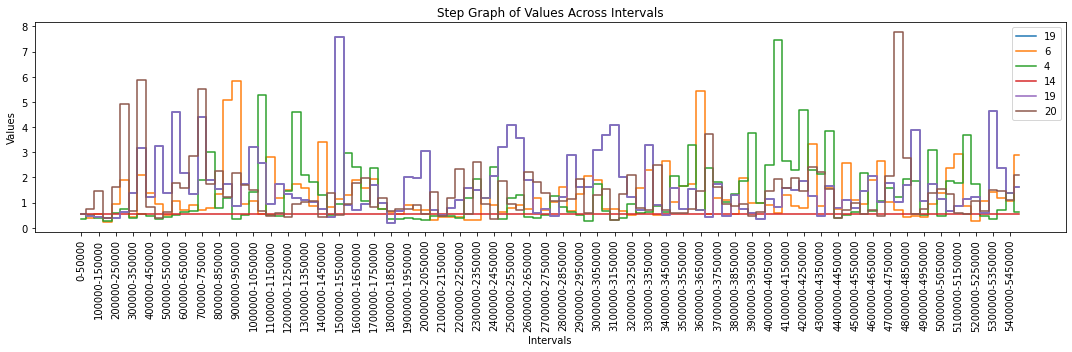

In [319]:
import matplotlib.pyplot as plt
import numpy as np
another_y_set= pd.read_csv('fin_6.csv').to_numpy()
y= pd.read_csv('fin_19.csv').to_numpy()

y_4= pd.read_csv('fin_4.csv').to_numpy()
y_5= pd.read_csv('fin_14.csv').to_numpy()

y_6= pd.read_csv('fin_19.csv').to_numpy()
y_7= pd.read_csv('fin_20.csv').to_numpy()


y_values1 = np.divide(y, 1)
y_values2 = np.divide(another_y_set, 1)


plt.figure(figsize=(15, 5))

plt.step(range(len(interval_list[:110])), y_values1[:110], where='mid', label='19')


plt.step(range(len(interval_list[:110])), y_values2[:110], where='mid', label='6')


plt.step(range(len(interval_list[:110])), y_4[:110], where='mid', label='4')


plt.step(range(len(interval_list[:110])), y_5[:110], where='mid', label='14')

plt.step(range(len(interval_list[:110])), y_6[:110], where='mid', label='19')


plt.step(range(len(interval_list[:110])), y_7[:110], where='mid', label='20')


plt.xticks(range(0, len(interval_list[:110]), 2), interval_list[:110][::2], rotation=90)

plt.xlabel('Intervals')
plt.ylabel('Values')
plt.title('Step Graph of Values Across Intervals')
plt.legend()  
plt.tight_layout()
plt.savefig('fin_6_4_14_19_20.jpg')
plt.show()


In [216]:
for i in range(1000):
    if another_y_set[i]!=pred_hu[i]:
        print(i,another_y_set[i],pred_hu[i])



1 [0.37675662] 0.37675661743157035
3 [0.24481454] 0.24481453912319734
5 [1.87910993] 1.8791099250969743
9 [0.94217327] 0.9421732651673073
25 [1.75016305] 1.7501630462895519
30 [1.15069265] 1.1506926504094321
32 [1.89224594] 1.8922459443085895
41 [0.31187579] 0.31187578833030405
42 [0.42573646] 0.42573645905661534
43 [0.4103491] 0.41034910305735983
45 [0.31245371] 0.31245370508738074
47 [1.19550281] 1.1955028097345581
77 [1.97974553] 1.9797455343898422
79 [0.96888315] 0.9688831524913061
91 [0.9427124] 0.9427123983425477
92 [1.90114356] 1.9011435581883214
93 [2.6419772] 2.6419772005535638
96 [0.41174349] 0.41174348549317324
101 [2.35480885] 2.3548088536834775
102 [2.93963614] 2.9396361445414794
115 [0.36344639] 0.36344639369016163
122 [2.62849994] 2.6284999417353676
123 [1.43880567] 1.4388056654687387
125 [0.47509674] 0.47509674267453766
132 [1.65613192] 1.6561319174355857
154 [1.86634085] 1.8663408464538254
155 [0.93631726] 0.9363172616076743
158 [1.04872526] 1.0487252634566657
159 [2.4

(array([[0.54027311],
        [0.37675662],
        [0.55967209],
        [0.24481454],
        [0.928524  ],
        [1.87910993],
        [0.41927253],
        [2.08614815],
        [1.38836975],
        [0.94217327],
        [0.52483667],
        [1.06247479],
        [0.70374765],
        [0.89956801],
        [0.69135454],
        [0.79889364],
        [1.34469452],
        [5.07274724],
        [5.85190997],
        [0.93986004],
        [1.079615  ],
        [0.55638563],
        [2.8005893 ],
        [1.1659224 ],
        [1.51033394],
        [1.75016305],
        [1.58013911],
        [0.85920477],
        [3.41291973],
        [0.83998209],
        [1.15069265],
        [1.30384045],
        [1.89224594],
        [1.56405631],
        [1.95347676],
        [0.74782172],
        [0.6108201 ],
        [0.53026071],
        [0.89149105],
        [0.69297436],
        [0.72034303],
        [0.31187579],
        [0.42573646],
        [0.4103491 ],
        [0.41198193],
        [0

In [212]:
pred_hu

[0.5402731058137054,
 0.37675661743157035,
 0.5596720890576521,
 0.24481453912319734,
 0.9285240017489608,
 1.8791099250969743,
 0.4192725284133573,
 2.086148151756783,
 1.388369747650237,
 0.9421732651673073,
 0.5248366740341542,
 1.0624747870603528,
 0.7037476518875079,
 0.899568006761108,
 0.6913545375646821,
 0.7988936361295306,
 1.344694523276731,
 5.0727472366412645,
 5.851909966031844,
 0.939860038298529,
 1.0796149966125366,
 0.5563856345941777,
 2.80058930115163,
 1.1659224047586103,
 1.5103339366151505,
 1.7501630462895519,
 1.580139106626572,
 0.859204771711106,
 3.4129197259624613,
 0.8399820852179001,
 1.1506926504094321,
 1.3038404505851195,
 1.8922459443085895,
 1.56405630501812,
 1.9534767598200904,
 0.7478217184868593,
 0.6108201028589,
 0.5302607141715275,
 0.8914910517581399,
 0.6929743590087165,
 0.7203430262912662,
 0.31187578833030405,
 0.42573645905661534,
 0.41034910305735983,
 0.4119819292471877,
 0.31245370508738074,
 0.3209697718396808,
 1.1955028097345581,
 

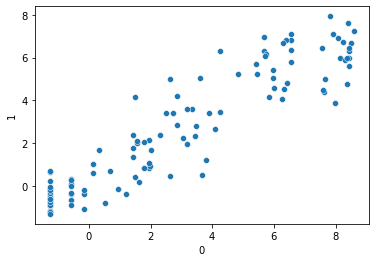

R2 Score: 0.8451491413906567
MSE: 1.8253986211593656
Speramanr: 0.9156227819255627


<Figure size 432x288 with 0 Axes>

In [100]:
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


from sklearn.metrics import mean_squared_error as MSE

pred = model.predict(pd.DataFrame(lis_train_pop_split))
    
pred_df= pd.DataFrame(pred)
true_df = pd.DataFrame(logit_(train_target_un_pop_split))
frames = [true_df, pred_df]
    

result =pd.concat([true_df,pred_df], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=0,y=1)
    
# Show the plot
plt.show()
plt.clf()
print("R2 Score:",r2_score(true_df, pred_df))
print("MSE:",MSE(true_df, pred_df))
rho, p = spearmanr(pred_df,true_df)
print('Speramanr:',rho)

In [56]:
import math
math.exp(pred)*4*70000

0.0021062181054033583

In [119]:
[true_df,pred_df]

[             0
 0    -1.266311
 1    -1.266311
 2    -1.266311
 3    -0.573164
 4    -1.266311
 ...        ...
 997   6.146453
 998   7.556159
 999   7.726495
 1000  6.889913
 1001  7.655147
 
 [1002 rows x 1 columns],
              0
 0    -6.187088
 1    -6.545878
 2    -6.099312
 3    -5.354836
 4    -5.607243
 ...        ...
 997  -2.010471
 998   2.013688
 999   2.203518
 1000  0.386913
 1001 -1.687836
 
 [1002 rows x 1 columns]]

In [57]:
(10e-9)*4*70000

0.0028

In [145]:
violi

In [33]:
make_shannon(lis_train_150k)[0],logit_(train_target_un_150k)[0]

(1.5476078005918341, -25.919265654642555)

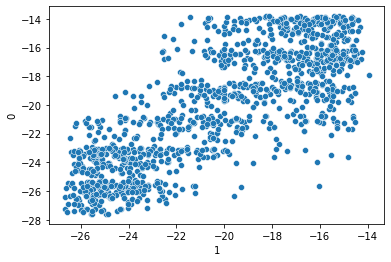

R2 Score: 0.6125885420120111
MSE: 6.197877140680716
Speramanr: 0.7718587821498427
Cross Validation score: [0.90275926 0.91177197 0.90078858 0.90605291 0.9081756 ]


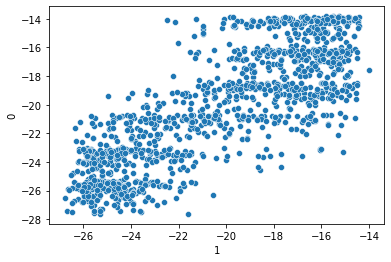

R2 Score: 0.6420558633049763
MSE: 5.602674191633569
Speramanr: 0.7960103015381899
Cross Validation score: [0.90026724 0.89636096 0.89910923 0.90249051 0.89927071]


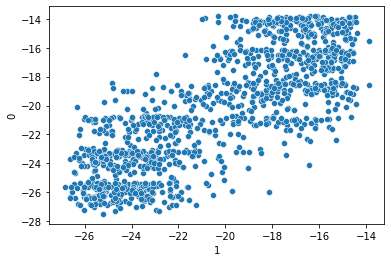

R2 Score: 0.6254167127918935
MSE: 5.843416902269224
Speramanr: 0.7822647081302035
Cross Validation score: [0.87970783 0.88284671 0.87097883 0.87429401 0.88104141]


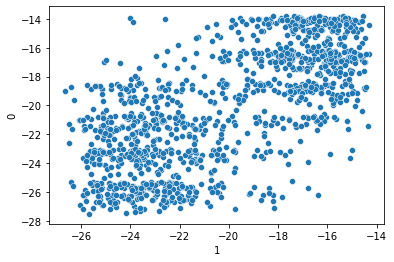

R2 Score: 0.435169146815343
MSE: 8.969814583630077
Speramanr: 0.6678685035271172
Cross Validation score: [0.76093701 0.73776103 0.76257995 0.77378144 0.77068566]


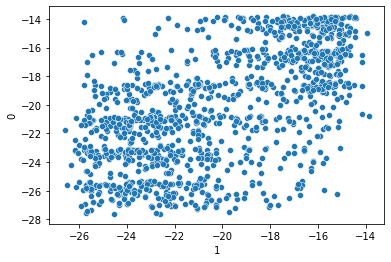

R2 Score: 0.28224867837847556
MSE: 11.054217460416158
Speramanr: 0.5954788825610486
Cross Validation score: [0.66098577 0.65432401 0.64918248 0.64537947 0.63979745]


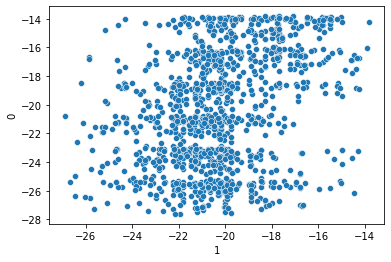

R2 Score: 0.04495821490582008
MSE: 15.212252784411591
Speramanr: 0.32770172257849367
Cross Validation score: [ 0.01171498 -0.03904294  0.01833265  0.03819513 -0.02058531]


<Figure size 432x288 with 0 Axes>

In [31]:
from sklearn.model_selection import train_test_split
X_train_150k, X_test_150k, y_train_150k, y_test_150k = train_test_split(make_shannon(lis_train_150k), logit_(train_target_un_150k), test_size=0.2)


#print(X_train_150k, X_test_150k, y_train_150k, y_test_150k )
model_it(X_train_150k, X_test_150k, y_train_150k, y_test_150k,lis_train_150k, logit_(train_target_un_150k))


X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(make_shannon(lis_train_100k), logit_(train_target_un_100k), test_size=0.2)
model_it(X_train_100k, X_test_100k, y_train_100k, y_test_100k,lis_train_100k, logit_(train_target_un_100k))

X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(make_shannon(lis_train_50k), logit_(train_target_un_50k), test_size=0.2)
model_it(X_train_50k, X_test_50k, y_train_50k, y_test_50k,lis_train_50k, logit_(train_target_un_50k))

X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(make_shannon(lis_train_10k), logit_(train_target_un_10k), test_size=0.2)
model_it(X_train_10k, X_test_10k, y_train_10k, y_test_10k,lis_train_10k, logit_(train_target_un_10k))

X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(make_shannon(lis_train_5k), logit_(train_target_un_5k), test_size=0.2)
model_it(X_train_5k, X_test_5k, y_train_5k, y_test_5k,lis_train_5k, logit_(train_target_un_5k))

X_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(make_shannon(lis_train_1k), logit_(train_target_un_1k), test_size=0.2)
model_it(X_train_1k, X_test_1k, y_train_1k, y_test_1k,lis_train_1k, logit_(train_target_un_1k))



In [217]:
result

,0,1
0,7.572274e-07,5.034011e-07
1,1.038645e-08,5.645411e-07
2,5.911595e-07,5.079300e-07
3,6.622205e-08,5.079300e-07
4,1.946211e-07,5.079300e-07
...,...,...
4995,5.260499e-08,4.943433e-07
4996,9.549007e-07,5.011366e-07
4997,6.390912e-07,4.966077e-07
4998,8.215337e-07,5.124589e-07


In [149]:
from scipy.stats import spearmanr
rho, p = spearmanr(pred_df,true_df)


In [150]:
rho

0.0013696758937499045

In [65]:
p

0.9228641461332141

In [218]:
infoFilename= os.path.join('./train',"train_rate.npy")
param =np.load(infoFilename)

In [219]:
param

array([4.23278173e-07, 5.21599833e-08, 5.04315826e-09, ...,
       8.09484784e-07, 1.21381116e-07, 8.17029978e-07])

In [220]:
max(param)

9.999504971394293e-07

In [221]:
list(param).index(max(param))

11985

In [222]:
min(param)

5.0654946706451514e-11

In [223]:
list(param).index(min(param))

6468

In [72]:
infoFilename= os.path.join('./train_150',"train_150.npy")
param =np.load(infoFilename)

FileNotFoundError: [Errno 2] No such file or directory: './train_150/train_150.npy'

In [225]:
param

array([7.57227363e-07, 1.03864452e-08, 5.91159487e-07, ...,
       6.39091220e-07, 8.21533728e-07, 2.97590084e-07])

In [226]:
max(param)

9.998256885367724e-07

In [227]:
list(param).index(max(param))

1273

In [228]:
min(param)

6.111681250110419e-11

In [229]:
list(param).index(min(param))

1297

In [4]:
nTa =np.load('./non_eq/non_eq_change.npy',allow_pickle=True)
nRa =np.load('./non_eq/non_eq_rate.npy',allow_pickle=True)

In [5]:
nRa

array([2.81869612e-01, 2.81869612e-01, 2.81869612e-01, ...,
       2.26764103e+03, 9.82315597e+02, 2.11148526e+03])

In [125]:
print(nTa[0])

[(0, 70000), (2.172983503750122, 48118.70877105933), (5.15231740324708, 99149.13290929502), (5.209762726057746, 37230.87291616278), (5.935163201515475, 2932.2833380237134), (6.13271421622876, 14685.986332322556)]


<Figure size 720x432 with 0 Axes>

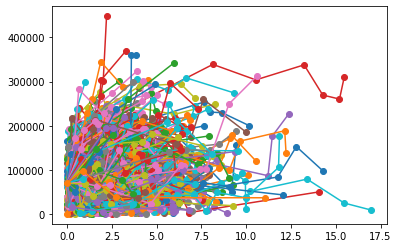

<Figure size 720x432 with 0 Axes>

In [133]:


for k in nTa:
    times, values = zip(*k)
    plt.plot(times, values, marker='o')


plt.figure(figsize=(10, 6))

#plt.title("Time Series Plot")

In [153]:
avg=[]
diffe =[]

for ind in range(1002):
    avg.append(np.average(nTa[ind], axis=0)[1])
    diffe.append(true_df.iloc[ind]-pred_df.iloc[ind])

In [154]:
frames = {'avg_changed':avg, 'True-Pred':diffe}

frames=pd.DataFrame(frames)
    

sns.scatterplot(data=frames,x=1,y=0)

ValueError: If using all scalar values, you must pass an index

In [155]:
frames

,avg_changed,True-Pred
0,45352.830711,"0 -0.488366 Name: 0, dtype: float64"
1,139811.390381,"0 -1.145751 Name: 1, dtype: float64"
2,68077.127297,"0 -0.486629 Name: 2, dtype: float64"
3,37436.301468,"0 -0.475975 Name: 3, dtype: float64"
4,70388.060354,"0 -0.403123 Name: 4, dtype: float64"
...,...,...
997,47918.286076,"0 1.912291 Name: 997, dtype: float64"
998,58048.235042,"0 1.073543 Name: 998, dtype: float64"
999,75131.777713,"0 -0.177917 Name: 999, dtype: float64"
1000,59592.026889,"0 2.070071 Name: 1000, dtype: float64"
